In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import io
data=pd.read_csv(r"C:\Users\Admin\Desktop\BREAST CANCER CATEGORISATION\\Dataset.csv")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


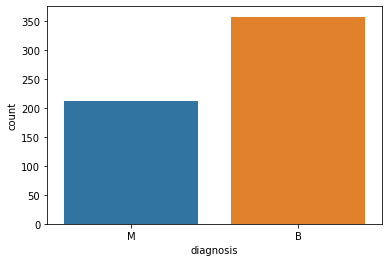

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [4]:
del data['Unnamed: 32']
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [6]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(16, activation='relu',kernel_initializer='uniform',input_dim=30))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(16,kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))


In [29]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 2s 6ms/step - loss: 0.6930 - accuracy: 0.5111
Epoch 2/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6696
Epoch 3/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6838
Epoch 4/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6863 - accuracy: 0.7671
Epoch 5/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.8520
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.9092
Epoch 7/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.9115
Epoch 8/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.9252
Epoch 9/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.9326
Epoch 10/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6112 - accuracy: 0.9408
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9865
Epoch 85/150
5/5 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9906
Epoch 86/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9918
Epoch 87/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9908
Epoch 88/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9893
Epoch 89/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0308 - accuracy: 0.9962
Epoch 90/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9845
Epoch 91/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9872
Epoch 92/150
5/5 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9891
Epoch 93/150
5/5 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9876
Epoch 94/150
5/5 [===============

In [31]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [32]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

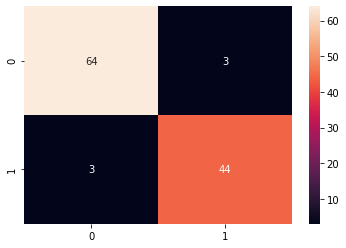

In [34]:
sns.heatmap(cm,annot=True)
plt.savefig('Categorization.png')

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30))
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))
  classifier.add(Dense(1,kernel_initializer='uniform' , activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)


In [36]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.95555556])

In [37]:
accuracies.mean()

0.9801449298858642

In [38]:
accuracies.std()

0.01832752235693276

In [40]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu',input_dim=30))
  classifier.add(Dense(16,kernel_initializer='uniform' , activation='relu'))
  classifier.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [41]:
classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
41/41 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.6270
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.9185
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.9516
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9744
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9783
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9822
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9836
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9803
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9825
Epoch 10/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.9855
Epoch 11/

41/41 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 85/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 93/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9996
Epoch 66/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 67/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9994
Epoch 68/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9964
Epoch 69/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9981
Epoch 70/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9991
Epoch 71/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 72/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 74/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 75/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9888
Epoch 48/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 49/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9944
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9875
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9914
Epoch 52/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9911
Epoch 53/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9913
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9963
Epoch 55/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 56/100
41/41 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9997   - 0s 3ms/step -

41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966
Epoch 29/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9883
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9923
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9970
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9944
Epoch 33/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9929
Epoch 34/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9990
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 36/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9978
Epoch 37/100
41/41 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9950   - 0s 3ms/step -

41/41 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9907
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9873
Epoch 11/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9911
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9918
Epoch 13/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9979
Epoch 14/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9924
Epoch 15/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9973
Epoch 16/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9977
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9853
Epoch 18/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9958
Epoch 19/100


41/41 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - 0s 5ms/step - loss: 7.5356e-04 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 5ms/step - loss: 6.1417e-04 - accuracy: 1.0000
Epoch 93/100
41/41 [==============================] - 0s 3ms/step - loss: 8.9366e-04 - accuracy: 1.0000
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 95/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 4.8276e-04 - accuracy: 1.0000
Epoch 97/100
41/41 [==============================] - 0s 3ms/step - loss: 4.9170e-04 - accuracy: 1.0000
Epoch 98/100
41/41 [==============================] - 0s 3ms/step - loss: 9.4761e-04 - accuracy: 1.0000
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 7.3634e-04 - ac

41/41 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9991
Epoch 72/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9964
Epoch 74/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 75/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9992
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 77/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 78/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 79/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 80/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 81/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9886
Epoch 55/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9915
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9938
Epoch 58/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9980
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9889
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9856
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9990
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 63/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9825
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 37/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9864
Epoch 38/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9941
Epoch 39/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9914
Epoch 40/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9912
Epoch 41/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 42/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 43/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9857
Epoch 44/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9898
Epoch 45/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9904
Epoch 18/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9875
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9881
Epoch 20/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9785
Epoch 21/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9940
Epoch 22/100
41/41 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9835
Epoch 23/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9966
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9883
Epoch 25/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9956
Epoch 26/100
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 99/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 100/100
41/41 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1/100
41/41 [==============================] - 2s 3ms/step - loss: 0.6863 - accuracy: 0.6828
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.9035
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.9450
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9504
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9702
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9699
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9937
Epoch 8/100
41/41 [

41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 80/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9921
Epoch 81/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 82/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9980
Epoch 83/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9986
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 85/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9995
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9947
Epoch 87/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 88/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9990
Epoch 89/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9936
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9861
Epoch 62/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9782
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 64/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9950
Epoch 66/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9951
Epoch 67/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 68/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9896
Epoch 69/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9911
Epoch 70/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9907
Epoch 42/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9969
Epoch 43/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9950
Epoch 44/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 45/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9919
Epoch 46/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9893
Epoch 47/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 48/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 49/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 50/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9962
Epoch 51/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9849
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9864
Epoch 25/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9853
Epoch 26/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 27/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9914
Epoch 28/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9939
Epoch 29/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9909
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9919
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9890
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9908
Epoch 33/100


41/41 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9628
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9718
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9745
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9627
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9868
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9917
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9868
Epoch 11/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9676
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9723
Epoch 13/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9918
Epoch 14/100
41/41

41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 9.6975e-04 - accuracy: 1.0000
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 89/100
41/41 [==============================] - 0s 5ms/step - loss: 5.6974e-04 - accuracy: 1.0000
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 9.4208e-04 - accuracy: 1.0000
Epoch 91/100
41/41 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000 - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 9.6772e-04 - accuracy: 1.0000
Epoch 93/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 7.9511e-04 - accuracy: 1.0000
Epoch 95/100
41/41 [=============================

41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 68/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 69/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 70/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9962
Epoch 71/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 72/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 73/100
41/41 [==============================] - 0s 3ms/step - loss: 6.1431e-04 - accuracy: 0.9998
Epoch 74/100
41/41 [==============================] - 0s 4ms/step - loss: 6.5614e-04 - accuracy: 1.0000
Epoch 75/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 76/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch

41/41 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9897
Epoch 48/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 49/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 50/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 51/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9984
Epoch 52/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9972
Epoch 53/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9945
Epoch 54/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 55/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9967
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9989
Epoch 57/100


Epoch 29/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9819
Epoch 30/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9864
Epoch 31/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9914
Epoch 32/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9833
Epoch 33/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9832
Epoch 34/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9842
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9921
Epoch 36/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9935
Epoch 37/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9828
Epoch 38/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9823


41/41 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9833
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9730
Epoch 13/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9907
Epoch 14/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9812
Epoch 15/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9905
Epoch 16/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9919
Epoch 17/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9814
Epoch 18/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9922
Epoch 19/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9808
Epoch 20/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 21/100


41/41 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 93/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9973
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 95/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9974
Epoch 96/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9980
Epoch 97/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 98/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 99/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9985
Epoch 100/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9988
Epoch 1/100
41/41 [==============================] - 2s 2ms/step - loss: 0.6779 - accuracy: 0.7771
Epoch 2/100
4

41/41 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9939
Epoch 75/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9938
Epoch 76/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9941
Epoch 77/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9861
Epoch 78/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 0.9935
Epoch 79/100
41/41 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9908
Epoch 80/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9894
Epoch 81/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 82/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9910
Epoch 83/100
41/41 [==============================] - 0s 3ms/step - los

41/41 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9917
Epoch 55/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9887
Epoch 56/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9932
Epoch 57/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 58/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9906
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 61/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9905
Epoch 62/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9840
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9929
Epoch 64/100


41/41 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9903
Epoch 37/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9915
Epoch 39/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9897
Epoch 40/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9917
Epoch 41/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 42/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 43/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9856
Epoch 44/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937
Epoch 46/500


41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 120/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 121/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4718e-04 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5529e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3104e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1118e-04 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 8.8451e-04 - a

41/41 [==============================] - 0s 3ms/step - loss: 7.4751e-05 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 3ms/step - loss: 9.2768e-05 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1071e-04 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 3ms/step - loss: 8.4294e-05 - accuracy: 1.0000
Epoch 198/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0427e-05 - accuracy: 1.0000
Epoch 199/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1929e-05 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5545e-05 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0825e-04 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 3ms/step - loss: 6.9876e-05 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.3766e-05 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9156e-05 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0394e-05 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6757e-05 - accuracy: 1.0000
Epoch 276/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5045e-05 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2685e-05 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3613e-05 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - ETA: 0s - loss: 1.0574e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 1.1190e-05 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3948e-06 - accuracy: 1.0000
Epoch 281/500
41/41 [==

41/41 [==============================] - 0s 3ms/step - loss: 2.3457e-06 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1519e-06 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8220e-06 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6216e-06 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7510e-06 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 5ms/step - loss: 1.9192e-06 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 4ms/step - loss: 2.1783e-06 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 4ms/step - loss: 1.5945e-06 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2821e-06 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 5ms/step - loss: 5.1541e-07 - accuracy: 1.0000
Epoch 427/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5324e-07 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4352e-07 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 4ms/step - loss: 2.9090e-07 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4163e-07 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9881e-07 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 5ms/step - loss: 3.3356e-07 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6453e-07 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0496e-07 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.3395 - accuracy: 0.9528
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9554
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9692
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9804
Epoch 7/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 0.9762
Epoch 8/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9905
Epoch 9/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9821
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9916
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9868
Epoch 12/500
41/41 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0

41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 84/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9999
Epoch 85/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 86/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 87/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 89/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 90/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 93/500


41/41 [==============================] - ETA: 0s - loss: 6.2408e-04 - accuracy: 1.00 - 0s 4ms/step - loss: 6.0665e-04 - accuracy: 1.0000
Epoch 164/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4293e-04 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6902e-04 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3764e-04 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3588e-04 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 4ms/step - loss: 3.4357e-04 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3379e-04 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5636e-04 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6805e-04 - accuracy: 1.0000
Epoch 172/500
41/41 [==

41/41 [==============================] - 0s 2ms/step - loss: 4.6457e-05 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 4ms/step - loss: 5.6550e-05 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 5ms/step - loss: 3.0114e-05 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7413e-05 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5446e-05 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9311e-05 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 5ms/step - loss: 1.0067e-04 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8349e-05 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8531e-05 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.6154e-06 - accuracy: 1.0000
Epoch 318/500
41/41 [==============================] - 0s 4ms/step - loss: 5.2801e-06 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 4ms/step - loss: 2.4337e-06 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2627e-06 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 4ms/step - loss: 5.2860e-06 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4483e-06 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5270e-06 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8183e-06 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - ETA: 0s - loss: 1.5118e-06 - accuracy: 1.00 - 0s 3ms/step - loss: 1.8210e-06 - accuracy: 1.0000
Epoch 326/500
41/41 [==

41/41 [==============================] - 0s 3ms/step - loss: 3.7317e-07 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8098e-07 - accuracy: 1.0000
Epoch 396/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7280e-07 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 4ms/step - loss: 5.7010e-07 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5929e-07 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0466e-07 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 2ms/step - loss: 4.4722e-07 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7826e-07 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 2ms/step - loss: 4.9358e-07 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 7.4589e-08 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 4ms/step - loss: 1.1748e-07 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 4ms/step - loss: 6.0768e-08 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1020e-07 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9665e-08 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 4ms/step - loss: 1.0173e-07 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 5ms/step - loss: 9.6100e-08 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 4ms/step - loss: 8.3620e-08 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 4ms/step - loss: 6.2849e-08 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9781
Epoch 52/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9924
Epoch 53/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9881
Epoch 54/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9907
Epoch 55/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9895
Epoch 56/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9954
Epoch 57/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9916
Epoch 58/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9915
Epoch 59/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9963
Epoch 60/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9943
Epoch 61/500


41/41 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 132/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 133/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5680e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 3ms/step - loss: 8.6698e-04 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 4ms/step - loss: 5.4507e-04 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 5ms/step - loss: 5.7784e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 4ms/step - loss: 5.5679e-04 - a

41/41 [==============================] - 0s 3ms/step - loss: 1.4810e-04 - accuracy: 1.0000
Epoch 209/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0336e-04 - accuracy: 1.0000
Epoch 210/500
41/41 [==============================] - 0s 3ms/step - loss: 5.8613e-05 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1717e-04 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5141e-05 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3505e-04 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0269e-04 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 2ms/step - loss: 9.0471e-05 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 4ms/step - loss: 5.1729e-05 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.1534e-05 - accuracy: 1.0000
Epoch 287/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4872e-05 - accuracy: 1.0000
Epoch 288/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1149e-05 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0932e-05 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0201e-05 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5871e-06 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0640e-05 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2006e-05 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2323e-05 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 1.8377e-06 - accuracy: 1.0000
Epoch 365/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5888e-06 - accuracy: 1.0000
Epoch 366/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5044e-06 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2328e-06 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9113e-06 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 4ms/step - loss: 1.5187e-06 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 4ms/step - loss: 1.2916e-06 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 4ms/step - loss: 1.0574e-06 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 4ms/step - loss: 1.3460e-06 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 5ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 2.6893e-07 - accuracy: 1.0000
Epoch 442/500
41/41 [==============================] - 0s 4ms/step - loss: 5.5922e-07 - accuracy: 1.0000
Epoch 443/500
41/41 [==============================] - 0s 4ms/step - loss: 3.8603e-07 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0998e-07 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0284e-07 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2090e-07 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4224e-07 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 4ms/step - loss: 4.8424e-07 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1770e-07 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9950
Epoch 21/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9934
Epoch 22/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9827
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9869
Epoch 24/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9929
Epoch 25/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9891
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9983
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9947
Epoch 28/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9907
Epoch 29/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9921
Epoch 30/500


41/41 [==============================] - 0s 2ms/step - loss: 5.5612e-04 - accuracy: 1.0000
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 8.7910e-04 - accuracy: 1.0000
Epoch 103/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3094e-04 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1381e-04 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7166e-04 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7530e-04 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8539e-04 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2123e-04 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 2ms/step - loss: 7.8327e-04 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.8075e-05 - accuracy: 1.0000
Epoch 180/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2058e-05 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4061e-05 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4558e-05 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5516e-05 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 5.5395e-05 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9385e-05 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3441e-05 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8557e-05 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 5.4551e-06 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 4ms/step - loss: 4.4910e-06 - accuracy: 1.0000
Epoch 259/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0093e-06 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 4ms/step - loss: 4.6412e-06 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 4ms/step - loss: 6.0451e-06 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4706e-06 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4198e-06 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0537e-06 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2266e-06 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.9200e-07 - accuracy: 1.0000
Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5873e-06 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8145e-07 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1905e-06 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - ETA: 0s - loss: 1.5431e-06 - accuracy: 1.00 - 0s 2ms/step - loss: 1.3800e-06 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1821e-06 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 7.3637e-07 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0902e-06 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 3ms/step - loss: 8.8453e-07 - accuracy: 1.0000
Epoch 343/500
41/41 [==

41/41 [==============================] - 0s 2ms/step - loss: 1.4224e-07 - accuracy: 1.0000
Epoch 412/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7678e-07 - accuracy: 1.0000
Epoch 413/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9802e-07 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6731e-07 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2574e-07 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2472e-07 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8268e-07 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 2ms/step - loss: 9.8684e-08 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2468e-07 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 3.5864e-08 - accuracy: 1.0000
Epoch 489/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7217e-08 - accuracy: 1.0000
Epoch 490/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5856e-08 - accuracy: 1.0000
Epoch 491/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6279e-08 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6001e-08 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0557e-08 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7519e-08 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4461e-08 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3597e-08 - accuracy: 1.0000: 0s - loss: 3.5327e-08 - accuracy: 1.00
Epoch 497/500
41/41 [========

41/41 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9952
Epoch 69/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9902
Epoch 70/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9902
Epoch 71/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9952
Epoch 72/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9978
Epoch 73/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9868
Epoch 74/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9975
Epoch 75/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9933
Epoch 76/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9945
Epoch 77/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 78/500


41/41 [==============================] - 0s 2ms/step - loss: 2.8175e-04 - accuracy: 1.0000
Epoch 148/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1913e-04 - accuracy: 1.0000
Epoch 149/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4035e-04 - accuracy: 1.0000
Epoch 150/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7657e-04 - accuracy: 1.0000
Epoch 151/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9809e-04 - accuracy: 1.0000
Epoch 152/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7799e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0660e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2554e-04 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5596e-04 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.6627e-05 - accuracy: 1.0000
Epoch 226/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4456e-05 - accuracy: 1.0000
Epoch 227/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0226e-05 - accuracy: 1.0000
Epoch 228/500
41/41 [==============================] - 0s 3ms/step - loss: 8.5941e-06 - accuracy: 1.0000
Epoch 229/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0550e-05 - accuracy: 1.0000
Epoch 230/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5417e-05 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1946e-05 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4840e-05 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4564e-05 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.6509e-06 - accuracy: 1.0000
Epoch 304/500
41/41 [==============================] - 0s 3ms/step - loss: 7.9214e-07 - accuracy: 1.0000
Epoch 305/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1525e-06 - accuracy: 1.0000
Epoch 306/500
41/41 [==============================] - 0s 3ms/step - loss: 8.2716e-07 - accuracy: 1.0000
Epoch 307/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1968e-07 - accuracy: 1.0000
Epoch 308/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4247e-06 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4183e-06 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4097e-06 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2972e-06 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 2.1848e-07 - accuracy: 1.0000
Epoch 380/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6904e-07 - accuracy: 1.0000
Epoch 381/500
41/41 [==============================] - 0s 4ms/step - loss: 2.5794e-07 - accuracy: 1.0000
Epoch 382/500
41/41 [==============================] - 0s 5ms/step - loss: 3.0593e-07 - accuracy: 1.0000
Epoch 383/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7268e-07 - accuracy: 1.0000
Epoch 384/500
41/41 [==============================] - 0s 5ms/step - loss: 2.4007e-07 - accuracy: 1.0000
Epoch 385/500
41/41 [==============================] - 0s 5ms/step - loss: 3.5130e-07 - accuracy: 1.0000: 0s - loss: 3.6327e-07 - accuracy: 1.00
Epoch 386/500
41/41 [==============================] - 0s 5ms/step - loss: 2.9597e-07 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 5ms/step - loss: 1.7685e-07 - accuracy: 1.0000
Epoch 388/500
41/41 [========

41/41 [==============================] - 0s 5ms/step - loss: 7.6111e-08 - accuracy: 1.0000
Epoch 457/500
41/41 [==============================] - 0s 5ms/step - loss: 3.4216e-08 - accuracy: 1.0000
Epoch 458/500
41/41 [==============================] - 0s 5ms/step - loss: 2.8726e-08 - accuracy: 1.0000
Epoch 459/500
41/41 [==============================] - 0s 5ms/step - loss: 5.0883e-08 - accuracy: 1.0000
Epoch 460/500
41/41 [==============================] - 0s 4ms/step - loss: 9.5363e-08 - accuracy: 1.0000
Epoch 461/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7245e-08 - accuracy: 1.0000
Epoch 462/500
41/41 [==============================] - 0s 5ms/step - loss: 4.1898e-08 - accuracy: 1.0000
Epoch 463/500
41/41 [==============================] - 0s 4ms/step - loss: 4.2907e-08 - accuracy: 1.0000
Epoch 464/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3604e-08 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 35/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9858
Epoch 36/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9986
Epoch 37/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9962
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9979
Epoch 39/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 40/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9970
Epoch 41/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 42/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9876
Epoch 43/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9895
Epoch 44/500


41/41 [==============================] - 0s 3ms/step - loss: 3.9426e-04 - accuracy: 1.0000
Epoch 116/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3838e-04 - accuracy: 1.0000
Epoch 117/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7146e-04 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0577e-04 - accuracy: 1.0000
Epoch 120/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 121/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4898e-04 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5555e-04 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1689e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 4ms/step - loss: 8.

41/41 [==============================] - 0s 2ms/step - loss: 2.4208e-05 - accuracy: 1.0000
Epoch 194/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4189e-05 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5893e-05 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3856e-05 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 3ms/step - loss: 8.7730e-05 - accuracy: 1.0000
Epoch 198/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3228e-05 - accuracy: 1.0000
Epoch 199/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1475e-04 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 2ms/step - loss: 3.6556e-05 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4007e-04 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 7.5622e-06 - accuracy: 1.0000
Epoch 272/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8788e-06 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 2ms/step - loss: 4.7590e-06 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5058e-05 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2767e-05 - accuracy: 1.0000
Epoch 276/500
41/41 [==============================] - 0s 4ms/step - loss: 5.3506e-06 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0482e-05 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 4ms/step - loss: 7.3947e-06 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1451e-05 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.2999e-06 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4413e-06 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9131e-07 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3480e-06 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3464e-07 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0403e-06 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0437e-06 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9833e-07 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4556e-06 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 5ms/step - loss: 4.3203e-07 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0745e-07 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1068e-07 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0847e-07 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0958e-07 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4689e-07 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7009e-07 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9177e-07 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6607e-07 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9640
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9560
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9750
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9831
Epoch 8/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9905
Epoch 9/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9939
Epoch 10/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9766
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9910
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9842
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9902
Epoch 14/500
41/41

41/41 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 86/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 87/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 89/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 90/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 93/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 94/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 95/500


41/41 [==============================] - 0s 3ms/step - loss: 2.5358e-04 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5480e-04 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1482e-04 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6828e-04 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 4ms/step - loss: 1.8887e-04 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 4ms/step - loss: 2.7425e-04 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0181e-04 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1528e-04 - accuracy: 1.0000
Epoch 172/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2599e-04 - accuracy: 1.0000
Epoch 173/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 3.4602e-05 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9056e-05 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 5ms/step - loss: 2.8994e-05 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 4ms/step - loss: 1.3407e-05 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7946e-05 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 4ms/step - loss: 1.7239e-05 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 5ms/step - loss: 1.5773e-05 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 4ms/step - loss: 1.8968e-05 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 4ms/step - loss: 1.9870e-05 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.9156e-06 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3446e-06 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9989e-06 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8255e-06 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4807e-06 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2567e-06 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6341e-06 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2129e-06 - accuracy: 1.0000
Epoch 326/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6060e-06 - accuracy: 1.0000
Epoch 327/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.2840e-07 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3984e-07 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3241e-07 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2508e-07 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 4ms/step - loss: 3.6609e-07 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 4ms/step - loss: 4.8710e-07 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5994e-07 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8519e-07 - accuracy: 1.0000
Epoch 404/500
41/41 [==============================] - 0s 3ms/step - loss: 2.9336e-07 - accuracy: 1.0000
Epoch 405/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 4ms/step - loss: 5.3438e-08 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 4ms/step - loss: 7.2692e-08 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5500e-08 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 4ms/step - loss: 7.5752e-08 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3735e-08 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5655e-08 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 4ms/step - loss: 7.6261e-08 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5835e-08 - accuracy: 1.0000
Epoch 481/500
41/41 [==============================] - 0s 3ms/step - loss: 6.9789e-08 - accuracy: 1.0000
Epoch 482/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9918
Epoch 54/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9972
Epoch 55/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9953
Epoch 56/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9854
Epoch 57/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9938
Epoch 58/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9989
Epoch 59/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.9894
Epoch 60/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9895
Epoch 61/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9975
Epoch 62/500
41/41 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.9954
Epoch 63/500


41/41 [==============================] - 0s 2ms/step - loss: 6.7122e-04 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 2ms/step - loss: 4.0786e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1240e-04 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4559e-04 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1704e-04 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8208e-04 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5458e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 4.7960e-04 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7220e-04 - accuracy: 1.0000
Epoch 142/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 1ms/step - loss: 8.2293e-05 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 1ms/step - loss: 7.6453e-05 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 4.5738e-05 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 2ms/step - loss: 9.7266e-05 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 2ms/step - loss: 6.8968e-05 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 1ms/step - loss: 5.0112e-05 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8872e-05 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 1ms/step - loss: 6.5481e-05 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 2ms/step - loss: 5.9426e-05 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 8.4698e-06 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 2ms/step - loss: 7.3789e-06 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 2ms/step - loss: 8.5396e-06 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 2ms/step - loss: 6.4573e-06 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 2ms/step - loss: 6.2972e-06 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0556e-05 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5153e-05 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0997e-05 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2245e-05 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.2399e-06 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3857e-06 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6733e-06 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7765e-06 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5264e-06 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6977e-06 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4065e-06 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3415e-06 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4836e-07 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.1258e-07 - accuracy: 1.0000
Epoch 443/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0356e-07 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0311e-07 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6050e-07 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4356e-07 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2836e-07 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3666e-07 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5824e-07 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7947e-07 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9853
Epoch 21/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9941
Epoch 22/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9848
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9898
Epoch 24/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9859
Epoch 25/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9862
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9802
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9912
Epoch 28/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9950
Epoch 29/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9855
Epoch 30/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 103/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 3.5323e-04 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7637e-04 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1163e-04 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4318e-04 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0342e-04 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5095e-04 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 4ms/step - loss: 4.5633e-04 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8574e-04 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2514e-04 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.0566e-05 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0150e-05 - accuracy: 1.0000
Epoch 259/500
41/41 [==============================] - 0s 2ms/step - loss: 7.2933e-05 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2371e-05 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6735e-05 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6510e-05 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0129e-05 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 2.3941e-05 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2059e-05 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - 

Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5307e-06 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0918e-06 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 5.1354e-06 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4672e-06 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4137e-06 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 2ms/step - loss: 8.6954e-06 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4258e-06 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 3ms/step - loss: 7.5962e-06 - accuracy: 1.0000
Epoch 343/500
41/41 [==============================] - 0s 2ms/step - loss: 5.9514e-06 - accuracy: 1.0000
Epoch 344/500
41/41 [==============================] - 

41/41 [==============================] - 0s 3ms/step - loss: 1.9852e-06 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9670e-07 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4373e-06 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0882e-06 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7536e-06 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 3ms/step - loss: 7.9110e-07 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 8.2115e-07 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1573e-06 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0978e-06 - accuracy: 1.0000
Epoch 422/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.1614e-07 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0063e-07 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6243e-07 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6755e-07 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6016e-07 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4058e-07 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2196e-07 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2683e-07 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2736e-07 - accuracy: 1.0000
Epoch 500/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 73/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 74/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 75/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 76/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 77/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 78/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 79/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 80/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 81/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 82/500


41/41 [==============================] - 0s 3ms/step - loss: 1.4898e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5060e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5545e-04 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7394e-04 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0360e-04 - accuracy: 1.0000
Epoch 157/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9727e-04 - accuracy: 1.0000
Epoch 158/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0164e-04 - accuracy: 1.0000
Epoch 159/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7181e-04 - accuracy: 1.0000
Epoch 160/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8223e-04 - accuracy: 1.0000
Epoch 161/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.2218e-05 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0789e-05 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9065e-05 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 3ms/step - loss: 2.9300e-05 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0578e-05 - accuracy: 1.0000
Epoch 235/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2412e-05 - accuracy: 1.0000
Epoch 236/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2756e-05 - accuracy: 1.0000
Epoch 237/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8314e-05 - accuracy: 1.0000
Epoch 238/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0430e-05 - accuracy: 1.0000
Epoch 239/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4804e-06 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2470e-06 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6436e-06 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6129e-06 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1611e-06 - accuracy: 1.0000
Epoch 313/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5763e-06 - accuracy: 1.0000
Epoch 314/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1184e-06 - accuracy: 1.0000
Epoch 315/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7208e-06 - accuracy: 1.0000
Epoch 316/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0285e-06 - accuracy: 1.0000
Epoch 317/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.1075e-07 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2647e-06 - accuracy: 1.0000
Epoch 388/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2799e-07 - accuracy: 1.0000
Epoch 389/500
41/41 [==============================] - 0s 2ms/step - loss: 7.4468e-07 - accuracy: 1.0000
Epoch 390/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2617e-07 - accuracy: 1.0000
Epoch 391/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4289e-06 - accuracy: 1.0000
Epoch 392/500
41/41 [==============================] - 0s 2ms/step - loss: 5.1723e-07 - accuracy: 1.0000
Epoch 393/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3771e-07 - accuracy: 1.0000
Epoch 394/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9488e-07 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.0962e-07 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4180e-07 - accuracy: 1.0000
Epoch 466/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5394e-07 - accuracy: 1.0000
Epoch 467/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3819e-07 - accuracy: 1.0000
Epoch 468/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1486e-07 - accuracy: 1.0000
Epoch 469/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5311e-07 - accuracy: 1.0000
Epoch 470/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5205e-08 - accuracy: 1.0000
Epoch 471/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0476e-07 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2212e-07 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9885
Epoch 44/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9876
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 46/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9937
Epoch 47/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9870
Epoch 48/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9900
Epoch 49/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 50/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 51/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 52/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 53/500


41/41 [==============================] - 0s 3ms/step - loss: 5.5658e-04 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 5.7124e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2595e-04 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2498e-04 - accuracy: 1.0000
Epoch 127/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5952e-04 - accuracy: 1.0000
Epoch 128/500
41/41 [==============================] - 0s 2ms/step - loss: 8.8142e-04 - accuracy: 1.0000
Epoch 129/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8423e-04 - accuracy: 1.0000
Epoch 130/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2882e-04 - accuracy: 1.0000
Epoch 131/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2849e-04 - accuracy: 1.0000
Epoch 132/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.8344e-08 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-07 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 4ms/step - loss: 1.4992e-07 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 4ms/step - loss: 7.9865e-08 - accuracy: 1.0000
Epoch 204/500
41/41 [==============================] - 0s 4ms/step - loss: 6.8918e-08 - accuracy: 1.0000
Epoch 205/500
41/41 [==============================] - 0s 4ms/step - loss: 4.7502e-08 - accuracy: 1.0000
Epoch 206/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3363e-07 - accuracy: 1.0000
Epoch 207/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8216e-08 - accuracy: 1.0000
Epoch 208/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3472e-08 - accuracy: 1.0000
Epoch 209/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 9.1912e-10 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3877e-10 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2544e-10 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1227e-10 - accuracy: 1.0000
Epoch 281/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2695e-10 - accuracy: 1.0000
Epoch 282/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0024e-10 - accuracy: 1.0000
Epoch 283/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5230e-10 - accuracy: 1.0000
Epoch 284/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0465e-09 - accuracy: 1.0000
Epoch 285/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3487e-10 - accuracy: 1.0000
Epoch 286/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.2626e-10 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9880e-10 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 9.0358e-10 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7707e-10 - accuracy: 1.0000
Epoch 359/500
41/41 [==============================] - 0s 3ms/step - loss: 9.4844e-10 - accuracy: 1.0000
Epoch 360/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4688e-10 - accuracy: 1.0000
Epoch 361/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3195e-10 - accuracy: 1.0000
Epoch 362/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3352e-10 - accuracy: 1.0000
Epoch 363/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1189e-10 - accuracy: 1.0000
Epoch 364/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.1330e-10 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5891e-10 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3937e-10 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6178e-10 - accuracy: 1.0000
Epoch 437/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0643e-09 - accuracy: 1.0000
Epoch 438/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7652e-10 - accuracy: 1.0000
Epoch 439/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1182e-10 - accuracy: 1.0000
Epoch 440/500
41/41 [==============================] - 0s 3ms/step - loss: 5.7140e-10 - accuracy: 1.0000
Epoch 441/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0885e-10 - accuracy: 1.0000
Epoch 442/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9858
Epoch 11/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9866
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9937
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9780
Epoch 14/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9942
Epoch 15/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9906
Epoch 16/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9829
Epoch 17/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9885
Epoch 18/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9952
Epoch 19/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9857
Epoch 20/500


41/41 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9886
Epoch 92/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9898
Epoch 93/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9858
Epoch 94/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 95/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9932
Epoch 97/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9957
Epoch 98/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9927
Epoch 99/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9927
Epoch 100/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9858
Epoch 101/50

41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9998
Epoch 173/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 174/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 175/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 176/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 177/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 178/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 179/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 180/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 181/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 254/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 255/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 256/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 257/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 258/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 259/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 334/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8579e-04 - accuracy: 1.0000
Epoch 335/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2317e-04 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7785e-04 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1340e-04 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0021 - accur

41/41 [==============================] - 0s 3ms/step - loss: 1.0555e-04 - accuracy: 1.0000
Epoch 413/500
41/41 [==============================] - 0s 3ms/step - loss: 4.7185e-04 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7454e-04 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5809e-04 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4254e-04 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7283e-04 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7610e-04 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2089e-04 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0181e-04 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 8.1287e-06 - accuracy: 1.0000
Epoch 491/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1424e-05 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5151e-05 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1185e-06 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0293e-06 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1025e-05 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5992e-06 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0881e-06 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4752e-06 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 72/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9959
Epoch 73/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0142 - accuracy: 0.9967
Epoch 74/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 75/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9885
Epoch 76/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 77/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 78/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9950
Epoch 79/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974
Epoch 80/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9920
Epoch 81/500


41/41 [==============================] - 0s 3ms/step - loss: 1.1289e-04 - accuracy: 1.0000
Epoch 151/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0541e-04 - accuracy: 1.0000
Epoch 152/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2115e-04 - accuracy: 1.0000
Epoch 153/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1231e-04 - accuracy: 1.0000
Epoch 154/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8817e-05 - accuracy: 1.0000
Epoch 155/500
41/41 [==============================] - 0s 3ms/step - loss: 9.7056e-05 - accuracy: 1.0000
Epoch 156/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0953e-05 - accuracy: 1.0000
Epoch 157/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5918e-05 - accuracy: 1.0000
Epoch 158/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8395e-05 - accuracy: 1.0000
Epoch 159/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.9863e-08 - accuracy: 1.0000
Epoch 228/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0970e-08 - accuracy: 1.0000
Epoch 229/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7087e-08 - accuracy: 1.0000
Epoch 230/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2633e-08 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 2ms/step - loss: 2.0343e-08 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0489e-08 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2461e-08 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3217e-08 - accuracy: 1.0000
Epoch 235/500
41/41 [==============================] - 0s 2ms/step - loss: 1.2722e-08 - accuracy: 1.0000
Epoch 236/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.3177e-09 - accuracy: 1.0000
Epoch 306/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1547e-09 - accuracy: 1.0000
Epoch 307/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9443e-09 - accuracy: 1.0000
Epoch 308/500
41/41 [==============================] - 0s 3ms/step - loss: 7.3130e-10 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2118e-09 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0793e-09 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6769e-09 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 3ms/step - loss: 2.2251e-09 - accuracy: 1.0000
Epoch 313/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3731e-10 - accuracy: 1.0000
Epoch 314/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.0633e-09 - accuracy: 1.0000
Epoch 384/500
41/41 [==============================] - 0s 3ms/step - loss: 8.3855e-10 - accuracy: 1.0000
Epoch 385/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2168e-10 - accuracy: 1.0000
Epoch 386/500
41/41 [==============================] - 0s 3ms/step - loss: 9.5153e-10 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 3ms/step - loss: 4.3470e-10 - accuracy: 1.0000
Epoch 388/500
41/41 [==============================] - 0s 3ms/step - loss: 4.5321e-10 - accuracy: 1.0000
Epoch 389/500
41/41 [==============================] - 0s 3ms/step - loss: 9.9257e-10 - accuracy: 1.0000
Epoch 390/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0399e-10 - accuracy: 1.0000
Epoch 391/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4352e-09 - accuracy: 1.0000
Epoch 392/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.9020e-10 - accuracy: 1.0000
Epoch 462/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0210e-10 - accuracy: 1.0000
Epoch 463/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0374e-10 - accuracy: 1.0000
Epoch 464/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2077e-10 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4097e-10 - accuracy: 1.0000
Epoch 466/500
41/41 [==============================] - 0s 3ms/step - loss: 3.8090e-10 - accuracy: 1.0000
Epoch 467/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3020e-10 - accuracy: 1.0000
Epoch 468/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9437e-10 - accuracy: 1.0000
Epoch 469/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4646e-10 - accuracy: 1.0000
Epoch 470/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9954
Epoch 42/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 43/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 44/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9971
Epoch 45/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 46/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 47/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 48/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9885
Epoch 49/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9888
Epoch 50/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9851
Epoch 51/500


41/41 [==============================] - 0s 3ms/step - loss: 9.2364e-05 - accuracy: 1.0000
Epoch 122/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4545e-05 - accuracy: 1.0000
Epoch 123/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7949e-05 - accuracy: 1.0000
Epoch 124/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1844e-04 - accuracy: 1.0000
Epoch 125/500
41/41 [==============================] - 0s 3ms/step - loss: 9.3067e-05 - accuracy: 1.0000
Epoch 126/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3566e-05 - accuracy: 1.0000
Epoch 127/500
41/41 [==============================] - 0s 3ms/step - loss: 7.6409e-05 - accuracy: 1.0000
Epoch 128/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6537e-05 - accuracy: 1.0000
Epoch 129/500
41/41 [==============================] - 0s 3ms/step - loss: 9.9048e-05 - accuracy: 1.0000
Epoch 130/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.5212e-09 - accuracy: 1.0000
Epoch 200/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8273e-09 - accuracy: 1.0000
Epoch 201/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0483e-09 - accuracy: 1.0000
Epoch 202/500
41/41 [==============================] - 0s 3ms/step - loss: 1.0672e-09 - accuracy: 1.0000
Epoch 203/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4598e-09 - accuracy: 1.0000
Epoch 204/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1251e-09 - accuracy: 1.0000
Epoch 205/500
41/41 [==============================] - 0s 3ms/step - loss: 9.8306e-10 - accuracy: 1.0000
Epoch 206/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7658e-09 - accuracy: 1.0000
Epoch 207/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7764e-09 - accuracy: 1.0000
Epoch 208/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.0191e-09 - accuracy: 1.0000
Epoch 277/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4343e-10 - accuracy: 1.0000
Epoch 278/500
41/41 [==============================] - 0s 3ms/step - loss: 4.7148e-10 - accuracy: 1.0000
Epoch 279/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8252e-10 - accuracy: 1.0000
Epoch 280/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4912e-10 - accuracy: 1.0000
Epoch 281/500
41/41 [==============================] - 0s 3ms/step - loss: 6.8523e-10 - accuracy: 1.0000
Epoch 282/500
41/41 [==============================] - 0s 3ms/step - loss: 5.8408e-10 - accuracy: 1.0000
Epoch 283/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3443e-10 - accuracy: 1.0000
Epoch 284/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0437e-10 - accuracy: 1.0000
Epoch 285/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 6.4376e-10 - accuracy: 1.0000
Epoch 354/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7474e-10 - accuracy: 1.0000
Epoch 355/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9279e-10 - accuracy: 1.0000
Epoch 356/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7039e-10 - accuracy: 1.0000
Epoch 357/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8932e-10 - accuracy: 1.0000
Epoch 358/500
41/41 [==============================] - 0s 3ms/step - loss: 4.6309e-10 - accuracy: 1.0000
Epoch 359/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9517e-10 - accuracy: 1.0000
Epoch 360/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7050e-10 - accuracy: 1.0000
Epoch 361/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0396e-10 - accuracy: 1.0000
Epoch 362/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 3.2662e-10 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 2ms/step - loss: 6.3570e-10 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 3ms/step - loss: 3.0938e-10 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 2ms/step - loss: 3.2567e-10 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8219e-10 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1170e-10 - accuracy: 1.0000
Epoch 437/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2609e-10 - accuracy: 1.0000
Epoch 438/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6121e-10 - accuracy: 1.0000
Epoch 439/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3751e-10 - accuracy: 1.0000
Epoch 440/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 10/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9798
Epoch 11/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9904
Epoch 12/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9894
Epoch 13/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952
Epoch 14/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9792
Epoch 15/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9905
Epoch 16/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9944
Epoch 17/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9892
Epoch 18/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9880
Epoch 19/500


41/41 [==============================] - 0s 5ms/step - loss: 6.2234e-04 - accuracy: 1.0000
Epoch 91/500
41/41 [==============================] - 0s 4ms/step - loss: 4.4905e-04 - accuracy: 1.0000
Epoch 92/500
41/41 [==============================] - 0s 4ms/step - loss: 7.9338e-04 - accuracy: 1.0000
Epoch 93/500
41/41 [==============================] - 0s 5ms/step - loss: 8.7986e-04 - accuracy: 1.0000
Epoch 94/500
41/41 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 95/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9730e-04 - accuracy: 1.0000
Epoch 96/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5753e-04 - accuracy: 1.0000
Epoch 97/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3786e-04 - accuracy: 1.0000
Epoch 98/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9259e-04 - accuracy: 1.0000
Epoch 99/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0873e

Epoch 168/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4600e-05 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2221e-06 - accuracy: 1.0000
Epoch 170/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9005e-05 - accuracy: 1.0000
Epoch 171/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6706e-06 - accuracy: 1.0000
Epoch 172/500
41/41 [==============================] - ETA: 0s - loss: 2.9569e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 2.4187e-05 - accuracy: 1.0000
Epoch 173/500
41/41 [==============================] - 0s 2ms/step - loss: 7.9832e-06 - accuracy: 1.0000
Epoch 174/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2985e-06 - accuracy: 1.0000
Epoch 175/500
41/41 [==============================] - 0s 3ms/step - loss: 7.2359e-06 - accuracy: 1.0000
Epoch 176/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2854e-05 - accuracy: 1.0000
Epoch 177

41/41 [==============================] - 0s 2ms/step - loss: 6.6704e-08 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 2ms/step - loss: 9.9137e-09 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - loss: 5.2004e-08 - accuracy: 1.0000
Epoch 248/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5210e-08 - accuracy: 1.0000
Epoch 249/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9773e-08 - accuracy: 1.0000
Epoch 250/500
41/41 [==============================] - 0s 3ms/step - loss: 2.3367e-08 - accuracy: 1.0000
Epoch 251/500
41/41 [==============================] - 0s 4ms/step - loss: 2.6396e-08 - accuracy: 1.0000
Epoch 252/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7078e-08 - accuracy: 1.0000
Epoch 253/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7816e-08 - accuracy: 1.0000
Epoch 254/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.7388e-09 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4621e-09 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1825e-09 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9638e-09 - accuracy: 1.0000
Epoch 326/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5886e-09 - accuracy: 1.0000
Epoch 327/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1572e-09 - accuracy: 1.0000
Epoch 328/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7502e-09 - accuracy: 1.0000
Epoch 329/500
41/41 [==============================] - 0s 3ms/step - loss: 1.4396e-09 - accuracy: 1.0000
Epoch 330/500
41/41 [==============================] - 0s 3ms/step - loss: 1.6170e-09 - accuracy: 1.0000
Epoch 331/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 7.6836e-10 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8733e-09 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2784e-10 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 3ms/step - loss: 6.7842e-10 - accuracy: 1.0000
Epoch 404/500
41/41 [==============================] - 0s 4ms/step - loss: 1.6785e-09 - accuracy: 1.0000
Epoch 405/500
41/41 [==============================] - 0s 4ms/step - loss: 8.6075e-10 - accuracy: 1.0000
Epoch 406/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9372e-10 - accuracy: 1.0000
Epoch 407/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8820e-09 - accuracy: 1.0000
Epoch 408/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1178e-10 - accuracy: 1.0000
Epoch 409/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 5.8454e-10 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 3ms/step - loss: 4.4168e-10 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - loss: 6.4743e-10 - accuracy: 1.0000
Epoch 481/500
41/41 [==============================] - 0s 3ms/step - loss: 8.6429e-10 - accuracy: 1.0000
Epoch 482/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1171e-10 - accuracy: 1.0000
Epoch 483/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1195e-09 - accuracy: 1.0000
Epoch 484/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7245e-10 - accuracy: 1.0000
Epoch 485/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9514e-10 - accuracy: 1.0000
Epoch 486/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8182e-10 - accuracy: 1.0000
Epoch 487/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 59/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 60/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9994
Epoch 61/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9985
Epoch 62/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 63/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9974
Epoch 64/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9973
Epoch 65/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9986
Epoch 66/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9971
Epoch 67/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9997
Epoch 68/500


41/41 [==============================] - 0s 2ms/step - loss: 3.4491e-04 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5648e-04 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 1.9543e-04 - accuracy: 1.0000
Epoch 142/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5476e-04 - accuracy: 1.0000
Epoch 143/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4434e-04 - accuracy: 1.0000
Epoch 144/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9099e-04 - accuracy: 1.0000
Epoch 145/500
41/41 [==============================] - 0s 3ms/step - loss: 4.1526e-04 - accuracy: 1.0000
Epoch 146/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0927e-04 - accuracy: 1.0000
Epoch 147/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1650e-04 - accuracy: 1.0000
Epoch 148/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 7.7173e-08 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5884e-08 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4749e-08 - accuracy: 1.0000
Epoch 220/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3083e-08 - accuracy: 1.0000
Epoch 221/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7707e-08 - accuracy: 1.0000
Epoch 222/500
41/41 [==============================] - 0s 3ms/step - loss: 3.3940e-08 - accuracy: 1.0000
Epoch 223/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6513e-08 - accuracy: 1.0000
Epoch 224/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3699e-08 - accuracy: 1.0000
Epoch 225/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0736e-08 - accuracy: 1.0000
Epoch 226/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.4413e-09 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5301e-09 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5601e-10 - accuracy: 1.0000
Epoch 298/500
41/41 [==============================] - 0s 1ms/step - loss: 2.2021e-09 - accuracy: 1.0000
Epoch 299/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1751e-09 - accuracy: 1.0000
Epoch 300/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5928e-09 - accuracy: 1.0000
Epoch 301/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7268e-09 - accuracy: 1.0000
Epoch 302/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000
Epoch 303/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2270e-09 - accuracy: 1.0000
Epoch 304/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.3078e-10 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 4ms/step - loss: 8.0412e-10 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 4ms/step - loss: 5.3398e-10 - accuracy: 1.0000
Epoch 376/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1277e-10 - accuracy: 1.0000
Epoch 377/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5513e-10 - accuracy: 1.0000
Epoch 378/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1808e-10 - accuracy: 1.0000
Epoch 379/500
41/41 [==============================] - 0s 3ms/step - loss: 1.9976e-10 - accuracy: 1.0000
Epoch 380/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1941e-09 - accuracy: 1.0000
Epoch 381/500
41/41 [==============================] - 0s 2ms/step - loss: 8.7650e-10 - accuracy: 1.0000
Epoch 382/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.5052e-10 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0835e-10 - accuracy: 1.0000
Epoch 452/500
41/41 [==============================] - 0s 2ms/step - loss: 1.7875e-10 - accuracy: 1.0000
Epoch 453/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5411e-10 - accuracy: 1.0000
Epoch 454/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0652e-09 - accuracy: 1.0000
Epoch 455/500
41/41 [==============================] - 0s 3ms/step - loss: 5.4655e-10 - accuracy: 1.0000
Epoch 456/500
41/41 [==============================] - 0s 3ms/step - loss: 1.5958e-10 - accuracy: 1.0000
Epoch 457/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6249e-10 - accuracy: 1.0000
Epoch 458/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8313e-10 - accuracy: 1.0000
Epoch 459/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9875
Epoch 30/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9900
Epoch 31/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9849
Epoch 32/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9874
Epoch 33/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9895
Epoch 34/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9902
Epoch 35/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9980
Epoch 36/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9777
Epoch 37/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9857
Epoch 38/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9870
Epoch 39/500


41/41 [==============================] - 0s 2ms/step - loss: 6.6914e-04 - accuracy: 1.0000
Epoch 111/500
41/41 [==============================] - 0s 2ms/step - loss: 8.4930e-04 - accuracy: 1.0000
Epoch 112/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3973e-04 - accuracy: 1.0000
Epoch 113/500
41/41 [==============================] - 0s 2ms/step - loss: 2.8016e-04 - accuracy: 1.0000
Epoch 114/500
41/41 [==============================] - 0s 3ms/step - loss: 5.3851e-04 - accuracy: 1.0000
Epoch 115/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6538e-04 - accuracy: 1.0000
Epoch 116/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9358e-04 - accuracy: 1.0000
Epoch 117/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8263e-04 - accuracy: 1.0000
Epoch 118/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9392e-04 - accuracy: 1.0000
Epoch 119/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 8.0320e-08 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1083e-08 - accuracy: 1.0000
Epoch 190/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2012e-08 - accuracy: 1.0000
Epoch 191/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6501e-08 - accuracy: 1.0000
Epoch 192/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7085e-08 - accuracy: 1.0000
Epoch 193/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2911e-08 - accuracy: 1.0000
Epoch 194/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1911e-08 - accuracy: 1.0000
Epoch 195/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3413e-08 - accuracy: 1.0000
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3410e-08 - accuracy: 1.0000
Epoch 197/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.9461e-10 - accuracy: 1.0000
Epoch 267/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4253e-09 - accuracy: 1.0000
Epoch 268/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8542e-09 - accuracy: 1.0000
Epoch 269/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7527e-09 - accuracy: 1.0000
Epoch 270/500
41/41 [==============================] - 0s 3ms/step - loss: 1.7074e-09 - accuracy: 1.0000
Epoch 271/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1312e-09 - accuracy: 1.0000
Epoch 272/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4259e-09 - accuracy: 1.0000
Epoch 273/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3634e-09 - accuracy: 1.0000
Epoch 274/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1411e-09 - accuracy: 1.0000
Epoch 275/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 2.1923e-09 - accuracy: 1.0000
Epoch 345/500
41/41 [==============================] - 0s 3ms/step - loss: 5.0635e-10 - accuracy: 1.0000
Epoch 346/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7268e-10 - accuracy: 1.0000
Epoch 347/500
41/41 [==============================] - 0s 3ms/step - loss: 7.7560e-10 - accuracy: 1.0000
Epoch 348/500
41/41 [==============================] - 0s 2ms/step - loss: 6.5968e-10 - accuracy: 1.0000
Epoch 349/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3942e-10 - accuracy: 1.0000
Epoch 350/500
41/41 [==============================] - 0s 3ms/step - loss: 1.3545e-09 - accuracy: 1.0000
Epoch 351/500
41/41 [==============================] - 0s 3ms/step - loss: 9.1180e-10 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 3ms/step - loss: 7.6078e-10 - accuracy: 1.0000
Epoch 353/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 4.4786e-10 - accuracy: 1.0000
Epoch 423/500
41/41 [==============================] - 0s 2ms/step - loss: 7.1691e-10 - accuracy: 1.0000
Epoch 424/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2165e-10 - accuracy: 1.0000
Epoch 425/500
41/41 [==============================] - 0s 2ms/step - loss: 2.4205e-10 - accuracy: 1.0000
Epoch 426/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1307e-10 - accuracy: 1.0000
Epoch 427/500
41/41 [==============================] - 0s 3ms/step - loss: 5.1560e-10 - accuracy: 1.0000
Epoch 428/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5806e-10 - accuracy: 1.0000
Epoch 429/500
41/41 [==============================] - 0s 2ms/step - loss: 5.4439e-10 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 2ms/step - loss: 5.0392e-10 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4910e-10 - accuracy: 1.0000
Epoch 1/500
41/41 [==============================] - 2s 2ms/step - loss: 0.6783 - accuracy: 0.8498
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.9421
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9311
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9588
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9695
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9639
Epoch 7/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9721
Epoch 8/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9865
Epoch 9/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9838
Epoch 10/500
41/41

41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9974
Epoch 82/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9940
Epoch 83/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9918
Epoch 84/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9970
Epoch 85/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9933
Epoch 86/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9910
Epoch 87/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9959
Epoch 88/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9958
Epoch 89/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 90/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9969
Epoch 91/500


41/41 [==============================] - 0s 3ms/step - loss: 1.7900e-05 - accuracy: 1.0000
Epoch 161/500
41/41 [==============================] - 0s 3ms/step - loss: 1.1194e-05 - accuracy: 1.0000
Epoch 162/500
41/41 [==============================] - 0s 3ms/step - loss: 7.0520e-06 - accuracy: 1.0000
Epoch 163/500
41/41 [==============================] - 0s 2ms/step - loss: 1.5640e-05 - accuracy: 1.0000
Epoch 164/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5322e-06 - accuracy: 1.0000
Epoch 165/500
41/41 [==============================] - 0s 3ms/step - loss: 6.3102e-06 - accuracy: 1.0000
Epoch 166/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2135e-05 - accuracy: 1.0000
Epoch 167/500
41/41 [==============================] - 0s 3ms/step - loss: 1.8240e-05 - accuracy: 1.0000
Epoch 168/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0454e-06 - accuracy: 1.0000
Epoch 169/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 3.5927e-09 - accuracy: 1.0000
Epoch 239/500
41/41 [==============================] - 0s 3ms/step - loss: 3.7271e-09 - accuracy: 1.0000
Epoch 240/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6974e-09 - accuracy: 1.0000
Epoch 241/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0890e-09 - accuracy: 1.0000
Epoch 242/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6463e-09 - accuracy: 1.0000
Epoch 243/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6184e-09 - accuracy: 1.0000
Epoch 244/500
41/41 [==============================] - 0s 2ms/step - loss: 1.4801e-09 - accuracy: 1.0000
Epoch 245/500
41/41 [==============================] - 0s 2ms/step - loss: 2.5738e-09 - accuracy: 1.0000
Epoch 246/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8494e-09 - accuracy: 1.0000
Epoch 247/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 6.4509e-10 - accuracy: 1.0000
Epoch 317/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7233e-10 - accuracy: 1.0000
Epoch 318/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2446e-10 - accuracy: 1.0000
Epoch 319/500
41/41 [==============================] - 0s 3ms/step - loss: 4.9523e-10 - accuracy: 1.0000
Epoch 320/500
41/41 [==============================] - 0s 2ms/step - loss: 8.3123e-10 - accuracy: 1.0000
Epoch 321/500
41/41 [==============================] - 0s 2ms/step - loss: 9.5294e-10 - accuracy: 1.0000
Epoch 322/500
41/41 [==============================] - 0s 2ms/step - loss: 9.4457e-10 - accuracy: 1.0000
Epoch 323/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0651e-09 - accuracy: 1.0000
Epoch 324/500
41/41 [==============================] - 0s 2ms/step - loss: 5.7811e-10 - accuracy: 1.0000
Epoch 325/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 5.5647e-10 - accuracy: 1.0000
Epoch 395/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3365e-10 - accuracy: 1.0000
Epoch 396/500
41/41 [==============================] - 0s 3ms/step - loss: 6.2686e-10 - accuracy: 1.0000
Epoch 397/500
41/41 [==============================] - 0s 2ms/step - loss: 6.3300e-10 - accuracy: 1.0000
Epoch 398/500
41/41 [==============================] - 0s 3ms/step - loss: 3.4302e-10 - accuracy: 1.0000
Epoch 399/500
41/41 [==============================] - 0s 2ms/step - loss: 7.7949e-10 - accuracy: 1.0000
Epoch 400/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1509e-10 - accuracy: 1.0000
Epoch 401/500
41/41 [==============================] - 0s 3ms/step - loss: 5.9834e-10 - accuracy: 1.0000
Epoch 402/500
41/41 [==============================] - 0s 3ms/step - loss: 6.5743e-10 - accuracy: 1.0000
Epoch 403/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.8448e-10 - accuracy: 1.0000
Epoch 472/500
41/41 [==============================] - 0s 3ms/step - loss: 4.8690e-10 - accuracy: 1.0000
Epoch 473/500
41/41 [==============================] - 0s 2ms/step - loss: 5.8795e-10 - accuracy: 1.0000
Epoch 474/500
41/41 [==============================] - 0s 3ms/step - loss: 6.1737e-10 - accuracy: 1.0000
Epoch 475/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0466e-10 - accuracy: 1.0000
Epoch 476/500
41/41 [==============================] - 0s 2ms/step - loss: 4.8093e-10 - accuracy: 1.0000
Epoch 477/500
41/41 [==============================] - 0s 3ms/step - loss: 4.2352e-10 - accuracy: 1.0000
Epoch 478/500
41/41 [==============================] - 0s 3ms/step - loss: 5.5038e-10 - accuracy: 1.0000
Epoch 479/500
41/41 [==============================] - 0s 2ms/step - loss: 9.1605e-10 - accuracy: 1.0000
Epoch 480/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9950
Epoch 52/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9878
Epoch 53/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9915
Epoch 54/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9932
Epoch 55/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 56/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 57/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9867
Epoch 58/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9906
Epoch 59/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9934
Epoch 60/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 61/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 133/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 134/500
41/41 [==============================] - 0s 1ms/step - loss: 9.7656e-04 - accuracy: 1.0000
Epoch 135/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 136/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 139/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 141/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000


41/41 [==============================] - 0s 2ms/step - loss: 1.4921e-07 - accuracy: 1.0000
Epoch 211/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8670e-07 - accuracy: 1.0000
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 1.1903e-07 - accuracy: 1.0000
Epoch 213/500
41/41 [==============================] - 0s 1ms/step - loss: 1.7689e-07 - accuracy: 1.0000
Epoch 214/500
41/41 [==============================] - 0s 1ms/step - loss: 7.7455e-08 - accuracy: 1.0000
Epoch 215/500
41/41 [==============================] - 0s 1ms/step - loss: 1.5174e-07 - accuracy: 1.0000
Epoch 216/500
41/41 [==============================] - 0s 1ms/step - loss: 9.9777e-08 - accuracy: 1.0000
Epoch 217/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6496e-07 - accuracy: 1.0000
Epoch 218/500
41/41 [==============================] - 0s 1ms/step - loss: 6.5033e-08 - accuracy: 1.0000
Epoch 219/500
41/41 [==============================] - 0s 1ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.6138e-09 - accuracy: 1.0000
Epoch 289/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3563e-09 - accuracy: 1.0000
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 1.3917e-09 - accuracy: 1.0000
Epoch 291/500
41/41 [==============================] - 0s 1ms/step - loss: 3.0305e-09 - accuracy: 1.0000
Epoch 292/500
41/41 [==============================] - 0s 2ms/step - loss: 1.1807e-09 - accuracy: 1.0000
Epoch 293/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0591e-09 - accuracy: 1.0000
Epoch 294/500
41/41 [==============================] - 0s 1ms/step - loss: 1.0484e-09 - accuracy: 1.0000
Epoch 295/500
41/41 [==============================] - 0s 2ms/step - loss: 9.7903e-10 - accuracy: 1.0000
Epoch 296/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2299e-09 - accuracy: 1.0000
Epoch 297/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.1657e-10 - accuracy: 1.0000
Epoch 367/500
41/41 [==============================] - 0s 2ms/step - loss: 5.5845e-10 - accuracy: 1.0000
Epoch 368/500
41/41 [==============================] - 0s 2ms/step - loss: 4.5600e-10 - accuracy: 1.0000
Epoch 369/500
41/41 [==============================] - 0s 2ms/step - loss: 8.9880e-10 - accuracy: 1.0000
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 4.6814e-10 - accuracy: 1.0000
Epoch 371/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1437e-10 - accuracy: 1.0000
Epoch 372/500
41/41 [==============================] - 0s 2ms/step - loss: 5.3397e-10 - accuracy: 1.0000
Epoch 373/500
41/41 [==============================] - 0s 2ms/step - loss: 5.3924e-10 - accuracy: 1.0000
Epoch 374/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3975e-10 - accuracy: 1.0000
Epoch 375/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 5.0278e-10 - accuracy: 1.0000
Epoch 444/500
41/41 [==============================] - 0s 2ms/step - loss: 4.0445e-10 - accuracy: 1.0000
Epoch 445/500
41/41 [==============================] - 0s 2ms/step - loss: 4.1139e-10 - accuracy: 1.0000
Epoch 446/500
41/41 [==============================] - 0s 2ms/step - loss: 2.1800e-10 - accuracy: 1.0000
Epoch 447/500
41/41 [==============================] - 0s 2ms/step - loss: 4.6332e-10 - accuracy: 1.0000
Epoch 448/500
41/41 [==============================] - 0s 2ms/step - loss: 5.8849e-10 - accuracy: 1.0000
Epoch 449/500
41/41 [==============================] - 0s 2ms/step - loss: 5.2944e-10 - accuracy: 1.0000
Epoch 450/500
41/41 [==============================] - 0s 2ms/step - loss: 4.2197e-10 - accuracy: 1.0000
Epoch 451/500
41/41 [==============================] - 0s 2ms/step - loss: 3.3287e-10 - accuracy: 1.0000
Epoch 452/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9835
Epoch 23/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9954
Epoch 24/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9798
Epoch 25/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9931
Epoch 26/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9915
Epoch 27/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9870
Epoch 28/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9893
Epoch 29/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9903
Epoch 30/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 31/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9889
Epoch 32/500


41/41 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 104/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 106/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 107/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 108/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 109/500
41/41 [==============================] - 0s 3ms/step - loss: 5.6640e-04 - accuracy: 1.0000
Epoch 110/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 111/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 112/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000


41/41 [==============================] - 0s 3ms/step - loss: 3.0792e-05 - accuracy: 1.0000
Epoch 182/500
41/41 [==============================] - 0s 3ms/step - loss: 2.5216e-05 - accuracy: 1.0000
Epoch 183/500
41/41 [==============================] - 0s 2ms/step - loss: 2.3231e-05 - accuracy: 1.0000
Epoch 184/500
41/41 [==============================] - 0s 3ms/step - loss: 2.0035e-05 - accuracy: 1.0000
Epoch 185/500
41/41 [==============================] - 0s 3ms/step - loss: 3.2388e-05 - accuracy: 1.0000
Epoch 186/500
41/41 [==============================] - 0s 3ms/step - loss: 2.7281e-05 - accuracy: 1.0000
Epoch 187/500
41/41 [==============================] - 0s 3ms/step - loss: 2.6664e-05 - accuracy: 1.0000
Epoch 188/500
41/41 [==============================] - 0s 3ms/step - loss: 2.1709e-05 - accuracy: 1.0000
Epoch 189/500
41/41 [==============================] - 0s 3ms/step - loss: 3.1411e-05 - accuracy: 1.0000
Epoch 190/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 3ms/step - loss: 1.5462e-07 - accuracy: 1.0000
Epoch 260/500
41/41 [==============================] - 0s 3ms/step - loss: 7.4525e-08 - accuracy: 1.0000
Epoch 261/500
41/41 [==============================] - 0s 3ms/step - loss: 1.2990e-07 - accuracy: 1.0000
Epoch 262/500
41/41 [==============================] - 0s 3ms/step - loss: 8.1345e-08 - accuracy: 1.0000
Epoch 263/500
41/41 [==============================] - 0s 3ms/step - loss: 2.4539e-08 - accuracy: 1.0000
Epoch 264/500
41/41 [==============================] - 0s 3ms/step - loss: 3.6859e-08 - accuracy: 1.0000
Epoch 265/500
41/41 [==============================] - 0s 3ms/step - loss: 6.0195e-08 - accuracy: 1.0000
Epoch 266/500
41/41 [==============================] - 0s 3ms/step - loss: 3.9831e-08 - accuracy: 1.0000
Epoch 267/500
41/41 [==============================] - 0s 3ms/step - loss: 8.9854e-09 - accuracy: 1.0000
Epoch 268/500
41/41 [==============================] - 0s 3ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 2.7515e-09 - accuracy: 1.0000
Epoch 336/500
41/41 [==============================] - 0s 2ms/step - loss: 2.6505e-09 - accuracy: 1.0000
Epoch 337/500
41/41 [==============================] - 0s 2ms/step - loss: 3.4144e-09 - accuracy: 1.0000
Epoch 338/500
41/41 [==============================] - 0s 2ms/step - loss: 1.6204e-09 - accuracy: 1.0000
Epoch 339/500
41/41 [==============================] - 0s 2ms/step - loss: 2.7046e-09 - accuracy: 1.0000
Epoch 340/500
41/41 [==============================] - 0s 3ms/step - loss: 4.0618e-09 - accuracy: 1.0000
Epoch 341/500
41/41 [==============================] - 0s 3ms/step - loss: 3.5109e-09 - accuracy: 1.0000
Epoch 342/500
41/41 [==============================] - 0s 2ms/step - loss: 2.2569e-09 - accuracy: 1.0000
Epoch 343/500
41/41 [==============================] - 0s 2ms/step - loss: 1.8159e-09 - accuracy: 1.0000
Epoch 344/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 1.5654e-09 - accuracy: 1.0000
Epoch 414/500
41/41 [==============================] - 0s 2ms/step - loss: 7.5472e-10 - accuracy: 1.0000
Epoch 415/500
41/41 [==============================] - 0s 2ms/step - loss: 9.8103e-10 - accuracy: 1.0000
Epoch 416/500
41/41 [==============================] - 0s 2ms/step - loss: 6.7983e-10 - accuracy: 1.0000
Epoch 417/500
41/41 [==============================] - 0s 2ms/step - loss: 6.9827e-10 - accuracy: 1.0000
Epoch 418/500
41/41 [==============================] - 0s 2ms/step - loss: 1.3850e-09 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 2ms/step - loss: 6.1403e-10 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 2ms/step - loss: 8.9921e-10 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 3ms/step - loss: 2.8152e-10 - accuracy: 1.0000
Epoch 422/500
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 4.4223e-10 - accuracy: 1.0000
Epoch 492/500
41/41 [==============================] - 0s 2ms/step - loss: 3.0735e-10 - accuracy: 1.0000
Epoch 493/500
41/41 [==============================] - 0s 2ms/step - loss: 9.4876e-10 - accuracy: 1.0000
Epoch 494/500
41/41 [==============================] - 0s 2ms/step - loss: 2.9400e-10 - accuracy: 1.0000
Epoch 495/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3411e-10 - accuracy: 1.0000
Epoch 496/500
41/41 [==============================] - 0s 2ms/step - loss: 3.8389e-10 - accuracy: 1.0000
Epoch 497/500
41/41 [==============================] - 0s 2ms/step - loss: 4.3227e-10 - accuracy: 1.0000
Epoch 498/500
41/41 [==============================] - 0s 2ms/step - loss: 1.0855e-09 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 2ms/step - loss: 3.7245e-10 - accuracy: 1.0000
Epoch 500/500
41/41 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9851
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9961
Epoch 74/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9893
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9951
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9922
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9860
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9840
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9896
Epoch 82/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9772
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9895
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9841
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9949
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9932
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9897
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9797
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9847
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9885
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9924
Epoch 64/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9895
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9880
Epoch 38/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9889
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9870
Epoch 40/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9854
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9899
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9787
Epoch 43/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9891
Epoch 44/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9827
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9895
Epoch 46/100


13/13 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9759
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9660
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9885
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9833
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9826
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - accuracy: 0.9821
Epoch 16/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9846
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9910
Epoch 18/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9856
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9906
Epoch 20/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9896
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9901
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9946
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9944
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9960
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9949
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946
Epoch 100/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9942
Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.6909
Epoch 2/100
1

13/13 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 67/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9987
Epoch 68/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9895
Epoch 69/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 70/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9923
Epoch 71/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 72/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9964
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9983
Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9935
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9980
Epoch 76/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9921
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9960
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9972
Epoch 43/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9956
Epoch 44/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9959
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9928
Epoch 46/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9947
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9949
Epoch 48/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9934
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9919
Epoch 50/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9780
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9808
Epoch 16/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9776
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9827
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9872
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9869
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9830
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9750
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9871
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9930
Epoch 24/100


13/13 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9895
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9862
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9892
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5825
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.7720
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.9219
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.9264
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.9537
Epoch 6/100
13/13

13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9937
Epoch 71/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9874
Epoch 72/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 73/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9897
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9932
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9908
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 78/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 79/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9909
Epoch 80/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9920
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9864
Epoch 46/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9871
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9958
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9938
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9874
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9917
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9941
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9898
Epoch 54/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9921
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9903
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9815
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9868
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0534 - accuracy: 0.9896
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9860
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9935
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9914
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9799
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9849
Epoch 28/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9900
Epoch 1/100
13/13 [==============================] - 3s 3ms/step - loss: 0.6890 - accuracy: 0.7209
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.9318
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.9506
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.9571
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.9452
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.9581
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.9703
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9646
Epoch 9/100
13/13 [=

13/13 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 74/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9921
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9965
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9877
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9869
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9882
Epoch 83/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9969
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9943
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9911
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9872
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9949
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9911
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9879
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9932
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9913
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9924
Epoch 56/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9912
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9779
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9773
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9873
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9852
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9925
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9897
Epoch 27/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9847
Epoch 28/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9776
Epoch 29/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9937
Epoch 30/100


Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 0.6913 - accuracy: 0.5217
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.8793
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9518
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.9538
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.9551
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.9654
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.9628
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2426 - accuracy: 0.9679
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9678
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9637
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9961
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9941
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9870
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9859
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9945
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9961
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9968
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9968
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9993
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 93/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9935
Epoch 57/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9980
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9975
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9978
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9957
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9955
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9943
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9953
Epoch 66/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9951
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9935
Epoch 31/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9972
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9965
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9914
Epoch 34/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9918
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9838
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9963
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9952
Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9940
Epoch 39/100


13/13 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.9482
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.9607
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.9544
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.9580
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.9694
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.9573
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9625
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9633
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9652
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9574
Epoch 13/100
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9962
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9890
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9918
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9947
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9851
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9882
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9907
Epoch 94/100


13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9924
Epoch 57/100
13/13 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9936
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9913
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9866
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9934
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9911
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9837
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9954
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9826
Epoch 30/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9925
Epoch 31/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9848
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9909
Epoch 33/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9923
Epoch 34/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9862
Epoch 35/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9929
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9947
Epoch 37/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9904
Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9893
Epoch 39/100


13/13 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.9419
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.9552
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.9575
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.9591
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.9676
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.93 - 0s 2ms/step - loss: 0.3156 - accuracy: 0.9538
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2571 - accuracy: 0.9773
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9717
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9811
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.14

13/13 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 85/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9849
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9854
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9881
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9886
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9883
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9851
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9918
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9836
Epoch 93/100


13/13 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9951
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9920
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 61/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9895
Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9943
Epoch 63/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9919
Epoch 64/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9943
Epoch 65/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9941
Epoch 66/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9938
Epoch 67/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9995
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 141/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9950
Epoch 142/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 143/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9974
Epoch 144/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9950
Epoch 145/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9982
Epoch 146/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9950
Epoch 147/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9985
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 221/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 222/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 223/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 224/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 225/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 226/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 227/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 4.8817e-04 - accuracy: 1.0000
Epoch 299/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7689e-04 - accuracy: 1.0000
Epoch 300/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3613e-04 - accuracy: 1.0000
Epoch 301/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2514e-04 - accuracy: 1.0000
Epoch 302/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2203e-04 - accuracy: 1.0000
Epoch 303/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6534e-04 - accuracy: 1.0000
Epoch 304/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9525e-04 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2634e-04 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7595e-04 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.2106e-04 - accuracy: 1.0000
Epoch 377/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0064e-04 - accuracy: 1.0000
Epoch 378/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3615e-04 - accuracy: 1.0000
Epoch 379/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8458e-04 - accuracy: 1.0000
Epoch 380/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7104e-04 - accuracy: 1.0000
Epoch 381/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9568e-04 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5075e-04 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5279e-04 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9368e-04 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2632e-04 - accuracy: 1.0000
Epoch 455/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6839e-05 - accuracy: 1.0000
Epoch 456/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5139e-05 - accuracy: 1.0000
Epoch 457/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4574e-05 - accuracy: 1.0000
Epoch 458/500
13/13 [==============================] - 0s 3ms/step - loss: 7.1902e-05 - accuracy: 1.0000
Epoch 459/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6795e-05 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1465e-05 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4270e-04 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0386e-04 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9866
Epoch 27/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9924
Epoch 28/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9844
Epoch 29/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9857
Epoch 30/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9883
Epoch 31/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9853
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9877
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9928
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9889
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9869
Epoch 36/500


Epoch 108/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9916
Epoch 109/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 110/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9910
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 112/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9970
Epoch 113/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9910
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9966
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 117/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accurac

13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 191/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 193/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 194/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 195/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 196/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 197/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 198/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 5.0671e-04 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0517e-04 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 7.5745e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6894e-04 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 3ms/step - loss: 8.2558e-04 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 3ms/step - loss: 7.1110e-04 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0856e-04 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4929e-04 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7379e-04 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.9616e-04 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5837e-04 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1754e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8383e-04 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6996e-04 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1814e-04 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2570e-04 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0960e-04 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8990e-04 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.6530e-04 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0294e-04 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6735e-05 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3086e-05 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0010e-04 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 5ms/step - loss: 9.8230e-05 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 6ms/step - loss: 8.9994e-05 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0067e-04 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6031e-04 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.6466
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.7544
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.8953
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.9327
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.9323
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.9416
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.9501
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9525
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9700
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1500 - accuracy: 0.9650
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9929
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9858
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9898
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9822
Epoch 90/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9823
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9954
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9876
Epoch 93/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9993
Epoch 164/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoc

Epoch 323/500
13/13 [==============================] - 0s 3ms/step - loss: 4.9424e-04 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 2ms/step - loss: 3.3897e-04 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3310e-04 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 3.5704e-04 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4503e-04 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1100e-04 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0957e-04 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2307e-04 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9950e-04 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 1.3671e-04 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2673e-04 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5982e-04 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0334e-04 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1677e-04 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3280e-04 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9138e-04 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3694e-04 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7773e-04 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 9.4757e-05 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 2ms/step - loss: 5.4511e-05 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 8.0561e-05 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 7.4786e-05 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6349e-05 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 3ms/step - loss: 8.2082e-05 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4952e-05 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 2ms/step - loss: 8.2657e-05 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 3ms/step - loss: 6.8383e-05 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9881
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9932
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9896
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9944
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9920
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9910
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9923
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9958
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9914
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9933
Epoch 61/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 141/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 7.3433e-04 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4571e-04 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 9.6759e-04 - accuracy: 1.0000
Epoch 218/500
13/13 [==============================] - 0s 3ms/step - loss: 7.7012e-04 - accuracy: 1.0000
Epoch 219/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1313e-04 - accuracy: 1.0000
Epoch 221/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5937e-04

13/13 [==============================] - 0s 3ms/step - loss: 2.4166e-04 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4690e-04 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0268e-04 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 3ms/step - loss: 3.2238e-04 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7849e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7750e-04 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6274e-04 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 5.2120e-04 - accuracy: 1.0000
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0588e-04 - accuracy: 1.0000
Epoch 298/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.4625e-04 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1562e-04 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2801e-04 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5169e-04 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6804e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3368e-04 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6455e-04 - accuracy: 1.0000
Epoch 374/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1856e-04 - accuracy: 1.0000
Epoch 375/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2525e-04 - accuracy: 1.0000
Epoch 376/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.3445e-04 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0294e-04 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1362e-04 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0882e-04 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2184e-04 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5278e-04 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4739e-04 - accuracy: 1.0000
Epoch 451/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4113e-04 - accuracy: 1.0000
Epoch 452/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4595e-05 - accuracy: 1.0000
Epoch 453/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9824
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9850
Epoch 17/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9887
Epoch 18/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9926
Epoch 19/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9955
Epoch 20/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9898
Epoch 21/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9926
Epoch 22/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9919
Epoch 23/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9891
Epoch 24/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9916
Epoch 25/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 98/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9952
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9888
Epoch 102/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9974
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9974
Epoch 104/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 105/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9988
Epoch 1

Epoch 177/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 178/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0233e-04 - accuracy: 1.0000
Epoch 179/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5985e-04 - accuracy: 1.0000
Epoch 180/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 181/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 182/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 183/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 186/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021 -

13/13 [==============================] - 0s 3ms/step - loss: 4.0132e-04 - accuracy: 1.0000
Epoch 256/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1476e-04 - accuracy: 1.0000
Epoch 257/500
13/13 [==============================] - 0s 5ms/step - loss: 8.0347e-04 - accuracy: 1.0000
Epoch 258/500
13/13 [==============================] - 0s 4ms/step - loss: 4.3431e-04 - accuracy: 1.0000
Epoch 259/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2832e-04 - accuracy: 1.0000
Epoch 260/500
13/13 [==============================] - 0s 4ms/step - loss: 3.7664e-04 - accuracy: 1.0000
Epoch 261/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1957e-04 - accuracy: 1.0000
Epoch 262/500
13/13 [==============================] - 0s 4ms/step - loss: 3.4504e-04 - accuracy: 1.0000
Epoch 263/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8511e-04 - accuracy: 1.0000
Epoch 264/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 8.3226e-05 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4472e-04 - accuracy: 1.0000
Epoch 334/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1521e-04 - accuracy: 1.0000
Epoch 335/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1724e-04 - accuracy: 1.0000
Epoch 336/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0572e-05 - accuracy: 1.0000
Epoch 337/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3481e-04 - accuracy: 1.0000
Epoch 338/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9160e-04 - accuracy: 1.0000
Epoch 339/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1697e-04 - accuracy: 1.0000
Epoch 340/500
13/13 [==============================] - 0s 2ms/step - loss: 3.1315e-04 - accuracy: 1.0000
Epoch 341/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 3.6656e-04 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7460e-05 - accuracy: 1.0000
Epoch 412/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0219e-04 - accuracy: 1.0000
Epoch 413/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3712e-05 - accuracy: 1.0000
Epoch 414/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8056e-04 - accuracy: 1.0000
Epoch 415/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0173e-05 - accuracy: 1.0000
Epoch 416/500
13/13 [==============================] - 0s 1ms/step - loss: 7.2071e-05 - accuracy: 1.0000
Epoch 417/500
13/13 [==============================] - 0s 2ms/step - loss: 4.8856e-05 - accuracy: 1.0000
Epoch 418/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7275e-04 - accuracy: 1.0000
Epoch 419/500
13/13 [==============================] - 0s 4ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.1587e-04 - accuracy: 1.0000
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 6.3613e-05 - accuracy: 1.0000
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3068e-04 - accuracy: 1.0000
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 1.2444e-04 - accuracy: 1.0000
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1444e-04 - accuracy: 1.0000
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1697e-05 - accuracy: 1.0000
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 6.4050e-05 - accuracy: 1.0000
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9596e-05 - accuracy: 1.0000
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1112e-04 - accuracy: 1.0000
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - 

Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9950
Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9976
Epoch 64/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9883
Epoch 65/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9903
Epoch 66/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9913
Epoch 67/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9926
Epoch 68/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9978
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9950
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9960
Epoch 71/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9895


13/13 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 144/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 145/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9993
Epoch 146/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 147/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.9978
Epoch 148/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 149/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 0.9950
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9982
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.9993
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 225/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 226/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9018e-04 - accuracy: 1.0000
Epoch 227/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 8.9941e-04 - accuracy: 1.0000
Epoch 230/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3249e-04 - accuracy: 1.0000
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 232/500
13/13 [==============================] - 0s 2ms/step - loss: 8.4806e-04 - accuracy: 1.0000
Epoch 233/500
13/13 [==============================] - 0s 2ms/step - loss: 8.7041e-04 - a

13/13 [==============================] - 0s 2ms/step - loss: 5.1931e-04 - accuracy: 1.0000
Epoch 303/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9152e-04 - accuracy: 1.0000
Epoch 304/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7842e-04 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 1ms/step - loss: 2.2720e-04 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 3.2325e-04 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4108e-04 - accuracy: 1.0000
Epoch 308/500
13/13 [==============================] - 0s 2ms/step - loss: 3.3245e-04 - accuracy: 1.0000
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0262e-04 - accuracy: 1.0000
Epoch 310/500
13/13 [==============================] - 0s 1ms/step - loss: 3.5467e-04 - accuracy: 1.0000
Epoch 311/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.5220e-04 - accuracy: 1.0000
Epoch 381/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5306e-04 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1342e-04 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 2ms/step - loss: 8.8442e-05 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 9.3373e-05 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5230e-04 - accuracy: 1.0000
Epoch 386/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7122e-04 - accuracy: 1.0000
Epoch 387/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9116e-05 - accuracy: 1.0000
Epoch 388/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5441e-04 - accuracy: 1.0000
Epoch 389/500
13/13 [==============================] - 0s 1ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 9.4241e-05 - accuracy: 1.0000
Epoch 458/500
13/13 [==============================] - 0s 2ms/step - loss: 8.9923e-05 - accuracy: 1.0000
Epoch 459/500
13/13 [==============================] - 0s 1ms/step - loss: 6.0953e-05 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1989e-05 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 1ms/step - loss: 6.4478e-05 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6438e-05 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1997e-05 - accuracy: 1.0000
Epoch 464/500
13/13 [==============================] - 0s 2ms/step - loss: 4.6065e-05 - accuracy: 1.0000
Epoch 465/500
13/13 [==============================] - 0s 1ms/step - loss: 1.0990e-04 - accuracy: 1.0000
Epoch 466/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9851
Epoch 30/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9914
Epoch 31/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9919
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9908
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9943
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9770
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9904
Epoch 36/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9926
Epoch 37/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9807
Epoch 38/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 39/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9956
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9951
Epoch 112/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9907
Epoch 113/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9928
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9924
Epoch 117/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9963
Epoch 118/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9901
Epoch 119/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9937
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 191/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9982
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9985
Epoch 193/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 194/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.9950
Epoch 195/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9988
Epoch 196/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9968
Epoch 197/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9985
Epoch 198/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.9974
Epoch 199/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9988
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 9.7607e-04 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 8.9564e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0759e-04 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 3ms/step - loss: 8.3531e-04 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 2ms/step - loss: 7.5554e-04 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 3ms/step - loss: 4.9669e-04 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6074e-04 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0450e-04 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3462e-04 - accuracy: 1.0000
Epoch 279/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.5073e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0953e-04 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0160e-04 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6148e-04 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5348e-04 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4254e-04 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1255e-04 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7288e-04 - accuracy: 1.0000
Epoch 356/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8050e-04 - accuracy: 1.0000
Epoch 357/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 7.1378e-05 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5024e-05 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 3ms/step - loss: 6.4215e-05 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 3ms/step - loss: 7.2438e-05 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6463e-05 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1189e-04 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2569e-04 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4154e-05 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - loss: 6.9997e-05 - accuracy: 1.0000
Epoch 434/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 1/500
13/13 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.6094
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.8632
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.9330
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.9591
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.9579
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.9537
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4165 - accuracy: 0.9614
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.9697
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2760 - accuracy: 0.9770
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9600
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9958
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9916
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9915
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9918
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9955
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9918
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9786
Epoch 90/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9898
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9884
Epoch 93/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9869
Epoch 165/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9948
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9907
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9918
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9935
Epoch 169/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9877
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9959
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9989
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 254/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 4.4034e-04 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3331e-04 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 4.7858e-04 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2971e-04 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7201e-04 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5899e-04 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4967e-04 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9270e-04 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7606e-04 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.1548e-04 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4441e-04 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4466e-04 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7545e-05 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 2ms/step - loss: 6.8953e-05 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8474e-04 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5737e-04 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0975e-04 - accuracy: 1.0000
Epoch 410/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4851e-04 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 5.3719e-05 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 2ms/step - loss: 4.8613e-05 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6336e-05 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7096e-05 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1836e-04 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0874e-04 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 3ms/step - loss: 7.4431e-05 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3644e-05 - accuracy: 1.0000
Epoch 488/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6832e-05 - accuracy: 1.0000
Epoch 489/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9905
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9806
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9921
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9962
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9957
Epoch 58/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9941
Epoch 59/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9920
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9874
Epoch 61/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9877
Epoch 62/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9894
Epoch 63/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9943
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9977
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9952
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9946
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9950
Epoch 139/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9981
Epoch 140/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 141/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9983
Epoch 142/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9985
Epoch 143/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9993
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9950
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 0.9985
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9993
Epoch 218/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9927
Epoch 219/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9988
Epoch 220/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 221/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9974
Epoch 222/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9974
Epoch 223/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9982
Epoch 224/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9985
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 5.3346e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1303e-04 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1103e-04 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9251e-04 - accuracy: 1.0000
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6127e-04 - accuracy: 1.0000
Epoch 298/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6763e-04 - accuracy: 1.0000
Epoch 299/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9030e-04 - accuracy: 1.0000
Epoch 300/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6104e-04 - accuracy: 1.0000
Epoch 301/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3073e-04 - accuracy: 1.0000
Epoch 302/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.4457e-04 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8050e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0553e-04 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1386e-04 - accuracy: 1.0000
Epoch 374/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5060e-04 - accuracy: 1.0000
Epoch 375/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6760e-04 - accuracy: 1.0000
Epoch 376/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0244e-04 - accuracy: 1.0000
Epoch 377/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8846e-04 - accuracy: 1.0000
Epoch 378/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3642e-04 - accuracy: 1.0000
Epoch 379/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 4.3208e-05 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0941e-04 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 2ms/step - loss: 6.5026e-05 - accuracy: 1.0000
Epoch 451/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6882e-05 - accuracy: 1.0000
Epoch 452/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9414e-05 - accuracy: 1.0000
Epoch 453/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7308e-05 - accuracy: 1.0000
Epoch 454/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3336e-05 - accuracy: 1.0000
Epoch 455/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8995e-05 - accuracy: 1.0000
Epoch 456/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3929e-05 - accuracy: 1.0000
Epoch 457/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9922
Epoch 21/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9828
Epoch 22/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9892
Epoch 23/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9897
Epoch 24/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9873
Epoch 25/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9912
Epoch 26/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9898
Epoch 27/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9827
Epoch 28/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9888
Epoch 29/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9901
Epoch 30/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9894
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 104/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9888
Epoch 105/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9893
Epoch 106/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9901
Epoch 107/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 108/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9841
Epoch 109/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9918
Epoch 110/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9875
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9877
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 186/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 187/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 188/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 190/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 191/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 192/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 5.2592e-04 - accuracy: 1.0000
Epoch 264/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6686e-04 - accuracy: 1.0000
Epoch 265/500
13/13 [==============================] - 0s 3ms/step - loss: 6.5838e-04 - accuracy: 1.0000
Epoch 266/500
13/13 [==============================] - 0s 3ms/step - loss: 7.9770e-04 - accuracy: 1.0000
Epoch 267/500
13/13 [==============================] - 0s 3ms/step - loss: 7.2013e-04 - accuracy: 1.0000
Epoch 268/500
13/13 [==============================] - 0s 3ms/step - loss: 7.8247e-04 - accuracy: 1.0000
Epoch 269/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4033e-04 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6651e-04 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 3ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 2.9063e-04 - accuracy: 1.0000
Epoch 341/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7381e-04 - accuracy: 1.0000
Epoch 342/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7410e-04 - accuracy: 1.0000
Epoch 343/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5601e-04 - accuracy: 1.0000
Epoch 344/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0760e-04 - accuracy: 1.0000
Epoch 345/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2829e-04 - accuracy: 1.0000
Epoch 346/500
13/13 [==============================] - ETA: 0s - loss: 7.8164e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 2.3118e-04 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9263e-04 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4939e-04 - accuracy: 1.0000
Epoch 349/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 7.8386e-05 - accuracy: 1.0000
Epoch 418/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1575e-04 - accuracy: 1.0000
Epoch 419/500
13/13 [==============================] - 0s 3ms/step - loss: 8.6554e-05 - accuracy: 1.0000
Epoch 420/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3104e-04 - accuracy: 1.0000
Epoch 421/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0247e-04 - accuracy: 1.0000
Epoch 422/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0838e-04 - accuracy: 1.0000
Epoch 423/500
13/13 [==============================] - 0s 2ms/step - loss: 7.2388e-05 - accuracy: 1.0000
Epoch 424/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1278e-04 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5122e-05 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 5.2697e-05 - accuracy: 1.0000
Epoch 495/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9330e-05 - accuracy: 1.0000
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2600e-05 - accuracy: 1.0000
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2307e-05 - accuracy: 1.0000
Epoch 498/500
13/13 [==============================] - 0s 3ms/step - loss: 4.8695e-05 - accuracy: 1.0000
Epoch 499/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0292e-05 - accuracy: 1.0000
Epoch 500/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - accuracy: 1.0000
Epoch 1/500
13/13 [==============================] - 3s 4ms/step - loss: 0.6901 - accuracy: 0.7402
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.9455
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6204 -

13/13 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9841
Epoch 69/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9885
Epoch 70/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9886
Epoch 71/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9897
Epoch 72/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9946
Epoch 73/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9911
Epoch 74/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9948
Epoch 75/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9922
Epoch 76/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9859
Epoch 77/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 78/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9961
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 151/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9978
Epoch 153/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 154/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 155/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 156/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 157/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9982
Epoch 158/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 2.5392e-05 - accuracy: 1.0000
Epoch 228/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9379e-05 - accuracy: 1.0000
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 3.3563e-05 - accuracy: 1.0000
Epoch 230/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2256e-05 - accuracy: 1.0000
Epoch 231/500
13/13 [==============================] - ETA: 0s - loss: 1.5110e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 5.2758e-05 - accuracy: 1.0000
Epoch 232/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0490e-05 - accuracy: 1.0000
Epoch 233/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7080e-05 - accuracy: 1.0000
Epoch 234/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6313e-05 - accuracy: 1.0000
Epoch 235/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5063e-05 - accuracy: 1.0000
Epoch 236/500
13/13 [==

13/13 [==============================] - 0s 2ms/step - loss: 1.9943e-08 - accuracy: 1.0000
Epoch 305/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4216e-08 - accuracy: 1.0000
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 2.0009e-08 - accuracy: 1.0000
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 3.1511e-08 - accuracy: 1.0000
Epoch 308/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0975e-08 - accuracy: 1.0000
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4718e-08 - accuracy: 1.0000
Epoch 310/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7642e-08 - accuracy: 1.0000
Epoch 311/500
13/13 [==============================] - 0s 1ms/step - loss: 1.5746e-08 - accuracy: 1.0000
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 2.1905e-08 - accuracy: 1.0000
Epoch 313/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 2.0191e-09 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5310e-09 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5934e-09 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6891e-09 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6279e-09 - accuracy: 1.0000
Epoch 386/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8153e-09 - accuracy: 1.0000
Epoch 387/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0334e-09 - accuracy: 1.0000
Epoch 388/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5054e-09 - accuracy: 1.0000
Epoch 389/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1791e-09 - accuracy: 1.0000
Epoch 390/500
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2865e-09 - accuracy: 1.0000
Epoch 460/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4989e-09 - accuracy: 1.0000
Epoch 461/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3794e-09 - accuracy: 1.0000
Epoch 462/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0768e-09 - accuracy: 1.0000
Epoch 463/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1868e-09 - accuracy: 1.0000
Epoch 464/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5331e-09 - accuracy: 1.0000
Epoch 465/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4113e-09 - accuracy: 1.0000
Epoch 466/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3013e-09 - accuracy: 1.0000
Epoch 467/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9969e-10 - accuracy: 1.0000
Epoch 468/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9898
Epoch 32/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9883
Epoch 33/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9816
Epoch 34/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9885
Epoch 35/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9877
Epoch 36/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9940
Epoch 37/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9787
Epoch 38/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9842
Epoch 39/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9792
Epoch 40/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9909
Epoch 41/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9896
Epoch 113/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9883
Epoch 114/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9886
Epoch 115/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9903
Epoch 117/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9856
Epoch 118/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9908
Epoch 119/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9927
Epoch 120/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9902
Epoch 121/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 3.8949e-04 - accuracy: 1.0000
Epoch 193/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9672e-04 - accuracy: 1.0000
Epoch 194/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3836e-04 - accuracy: 1.0000
Epoch 195/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7479e-04 - accuracy: 1.0000
Epoch 196/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2596e-04 - accuracy: 1.0000
Epoch 197/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3580e-04 - accuracy: 1.0000
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0970e-04 - accuracy: 1.0000
Epoch 199/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9679e-04 - accuracy: 1.0000
Epoch 200/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7035e-04 - accuracy: 1.0000
Epoch 201/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 4.4423e-07 - accuracy: 1.0000
Epoch 270/500
13/13 [==============================] - 0s 2ms/step - loss: 7.6475e-07 - accuracy: 1.0000
Epoch 271/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3971e-07 - accuracy: 1.0000
Epoch 272/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4707e-07 - accuracy: 1.0000
Epoch 273/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2381e-07 - accuracy: 1.0000
Epoch 274/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2921e-07 - accuracy: 1.0000
Epoch 275/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1322e-07 - accuracy: 1.0000
Epoch 276/500
13/13 [==============================] - 0s 3ms/step - loss: 2.6183e-07 - accuracy: 1.0000
Epoch 277/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6429e-07 - accuracy: 1.0000
Epoch 278/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 5.6099e-09 - accuracy: 1.0000
Epoch 347/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0141e-08 - accuracy: 1.0000
Epoch 348/500
13/13 [==============================] - 0s 2ms/step - loss: 5.2544e-09 - accuracy: 1.0000
Epoch 349/500
13/13 [==============================] - 0s 2ms/step - loss: 5.0831e-09 - accuracy: 1.0000
Epoch 350/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7299e-09 - accuracy: 1.0000
Epoch 351/500
13/13 [==============================] - 0s 2ms/step - loss: 7.9334e-09 - accuracy: 1.0000
Epoch 352/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1932e-09 - accuracy: 1.0000
Epoch 353/500
13/13 [==============================] - 0s 2ms/step - loss: 5.5449e-09 - accuracy: 1.0000
Epoch 354/500
13/13 [==============================] - 0s 2ms/step - loss: 9.8481e-09 - accuracy: 1.0000
Epoch 355/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.9958e-09 - accuracy: 1.0000
Epoch 425/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1286e-09 - accuracy: 1.0000
Epoch 426/500
13/13 [==============================] - 0s 2ms/step - loss: 1.3893e-09 - accuracy: 1.0000
Epoch 427/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0695e-09 - accuracy: 1.0000
Epoch 428/500
13/13 [==============================] - 0s 2ms/step - loss: 3.4879e-09 - accuracy: 1.0000
Epoch 429/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1783e-09 - accuracy: 1.0000
Epoch 430/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2662e-09 - accuracy: 1.0000
Epoch 431/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0061e-09 - accuracy: 1.0000
Epoch 432/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9149e-09 - accuracy: 1.0000
Epoch 433/500
13/13 [==============================] - 0s 2ms/step - 

Epoch 1/500
13/13 [==============================] - 2s 3ms/step - loss: 0.6889 - accuracy: 0.8496
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.9100
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.9416
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.9421
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.9347
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.9572
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.9570
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9569
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9673
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9779
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9867
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9822
Epoch 85/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9913
Epoch 87/500
13/13 [==============================] - 0s 865us/step - loss: 0.0355 - accuracy: 0.9856
Epoch 88/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9856
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9864
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9874
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9925
Epoch 92/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9914
Epoch 93/50

13/13 [==============================] - 0s 2ms/step - loss: 5.3858e-04 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0498e-04 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 8.2252e-04 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4137e-04 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4663e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 1ms/step - loss: 4.4819e-04 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 891us/step - loss: 4.2061e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 2ms/step - loss: 3.9590e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2156e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 2ms/step 

13/13 [==============================] - 0s 2ms/step - loss: 1.6256e-07 - accuracy: 1.0000
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1073e-07 - accuracy: 1.0000
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 8.4968e-08 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 1.1499e-07 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 9.4617e-08 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 1.0459e-07 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2133e-08 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 1ms/step - loss: 9.8982e-08 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 6.2441e-08 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.7287e-09 - accuracy: 1.0000
Epoch 320/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9100e-09 - accuracy: 1.0000
Epoch 321/500
13/13 [==============================] - 0s 3ms/step - loss: 3.6495e-09 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7180e-09 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - ETA: 0s - loss: 9.8845e-09 - accuracy: 1.00 - 0s 3ms/step - loss: 4.5513e-09 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 4ms/step - loss: 3.3172e-09 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2620e-09 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9793e-09 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5186e-09 - accuracy: 1.0000
Epoch 328/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 1.1241e-09 - accuracy: 1.0000
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2347e-09 - accuracy: 1.0000
Epoch 398/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2479e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5681e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6846e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2038e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6001e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1900e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1404e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.0907e-09 - accuracy: 1.0000
Epoch 475/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4280e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3546e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 2ms/step - loss: 1.4687e-09 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1135e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0530e-10 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0873e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 8.5750e-10 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0558e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9968
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9967
Epoch 49/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9903
Epoch 50/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9896
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9925
Epoch 52/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9924
Epoch 53/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9911
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9961
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9943
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9957
Epoch 57/500


13/13 [==============================] - 0s 2ms/step - loss: 6.9236e-04 - accuracy: 1.0000
Epoch 129/500
13/13 [==============================] - 0s 2ms/step - loss: 4.7827e-04 - accuracy: 1.0000
Epoch 130/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 131/500
13/13 [==============================] - 0s 2ms/step - loss: 7.4142e-04 - accuracy: 1.0000
Epoch 132/500
13/13 [==============================] - 0s 2ms/step - loss: 6.7629e-04 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0660e-04 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0954e-04 - accuracy: 1.0000
Epoch 135/500
13/13 [==============================] - 0s 3ms/step - loss: 6.9805e-04 - accuracy: 1.0000
Epoch 136/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0889e-04 - accuracy: 1.0000
Epoch 137/500
13/13 [==============================] - 0s 2ms/step - loss

13/13 [==============================] - 0s 3ms/step - loss: 5.2948e-08 - accuracy: 1.0000
Epoch 206/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6898e-08 - accuracy: 1.0000
Epoch 207/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3071e-08 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 3ms/step - loss: 3.9244e-08 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4178e-08 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3530e-08 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8967e-08 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7598e-08 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9154e-08 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.6403e-09 - accuracy: 1.0000
Epoch 283/500
13/13 [==============================] - 0s 2ms/step - loss: 2.9062e-09 - accuracy: 1.0000
Epoch 284/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3051e-09 - accuracy: 1.0000
Epoch 285/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8908e-09 - accuracy: 1.0000
Epoch 286/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1959e-09 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9440e-09 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4620e-09 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0661e-09 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1020e-09 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.4197e-09 - accuracy: 1.0000
Epoch 360/500
13/13 [==============================] - 0s 4ms/step - loss: 1.2984e-09 - accuracy: 1.0000
Epoch 361/500
13/13 [==============================] - 0s 4ms/step - loss: 2.1168e-09 - accuracy: 1.0000
Epoch 362/500
13/13 [==============================] - 0s 4ms/step - loss: 1.0605e-09 - accuracy: 1.0000
Epoch 363/500
13/13 [==============================] - 0s 4ms/step - loss: 1.0221e-09 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 3ms/step - loss: 9.6146e-10 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6028e-09 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3758e-09 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2105e-09 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 4ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 8.2559e-10 - accuracy: 1.0000
Epoch 437/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0422e-09 - accuracy: 1.0000
Epoch 438/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0265e-10 - accuracy: 1.0000
Epoch 439/500
13/13 [==============================] - 0s 2ms/step - loss: 8.4960e-10 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1882e-09 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 8.0790e-10 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6292e-10 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0243e-09 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7060e-10 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9570
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9522
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9606
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9488
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9632
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9700
Epoch 13/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9777
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9729
Epoch 15/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9819
Epoch 16/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9790
Epoch 17/500
13

13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9978
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9927
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9974
Epoch 91/500
13/13 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.9985
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9961
Epoch 94/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9974
Epoch 95/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 6.1460e-05 - accuracy: 1.0000
Epoch 165/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0589e-05 - accuracy: 1.0000
Epoch 166/500
13/13 [==============================] - 0s 4ms/step - loss: 2.4442e-04 - accuracy: 1.0000
Epoch 167/500
13/13 [==============================] - 0s 4ms/step - loss: 1.1438e-04 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - ETA: 0s - loss: 9.6220e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0065e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1291e-04 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4165e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4509e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 8.5792e-05 - accuracy: 1.0000
Epoch 173/500
13/13 [==

13/13 [==============================] - 0s 4ms/step - loss: 6.5183e-06 - accuracy: 1.0000
Epoch 242/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6350e-06 - accuracy: 1.0000
Epoch 243/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4859e-06 - accuracy: 1.0000
Epoch 244/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1201e-06 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8432e-06 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4695e-06 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3566e-06 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2200e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7355e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 4.9361e-08 - accuracy: 1.0000
Epoch 318/500
13/13 [==============================] - 0s 2ms/step - loss: 5.9113e-08 - accuracy: 1.0000
Epoch 319/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3765e-08 - accuracy: 1.0000
Epoch 320/500
13/13 [==============================] - 0s 3ms/step - loss: 8.8857e-08 - accuracy: 1.0000
Epoch 321/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7445e-08 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4701e-08 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - 0s 2ms/step - loss: 5.3033e-08 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6443e-08 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 4.4660e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 3.7140e-09 - accuracy: 1.0000
Epoch 395/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0239e-08 - accuracy: 1.0000
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 7.3150e-09 - accuracy: 1.0000
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 7.0991e-09 - accuracy: 1.0000
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0744e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 6.7487e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7062e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 2ms/step - loss: 2.8397e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7687e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 4.1996e-09 - accuracy: 1.0000
Epoch 473/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6079e-09 - accuracy: 1.0000
Epoch 474/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0929e-09 - accuracy: 1.0000
Epoch 475/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2835e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0510e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 3ms/step - loss: 9.7659e-10 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3844e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - ETA: 0s - loss: 5.1444e-10 - accuracy: 1.00 - 0s 2ms/step - loss: 1.7708e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 3ms/step - loss: 3.0257e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9927
Epoch 45/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9926
Epoch 46/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9845
Epoch 47/500
13/13 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9922
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9931
Epoch 49/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9969
Epoch 50/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9977
Epoch 51/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9922
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9883
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9933
Epoch 54/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 126/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 127/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 128/500
13/13 [==============================] - ETA: 0s - loss: 9.8372e-05 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 131/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 132/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 133/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 134/500
13/13 [==============================] - ETA:

13/13 [==============================] - 0s 3ms/step - loss: 1.0893e-04 - accuracy: 1.0000
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 1.0479e-04 - accuracy: 1.0000
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0937e-04 - accuracy: 1.0000
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3051e-04 - accuracy: 1.0000
Epoch 207/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3194e-04 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6772e-04 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 2ms/step - loss: 2.6813e-04 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3940e-04 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 2ms/step - loss: 2.9095e-04 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.6574e-05 - accuracy: 1.0000
Epoch 282/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9122e-05 - accuracy: 1.0000
Epoch 283/500
13/13 [==============================] - 0s 2ms/step - loss: 4.4382e-05 - accuracy: 1.0000
Epoch 284/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1317e-06 - accuracy: 1.0000
Epoch 285/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1061e-05 - accuracy: 1.0000
Epoch 286/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9879e-06 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5004e-05 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2635e-05 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2165e-05 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.8084e-07 - accuracy: 1.0000
Epoch 360/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9933e-06 - accuracy: 1.0000
Epoch 361/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2879e-06 - accuracy: 1.0000
Epoch 362/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3543e-06 - accuracy: 1.0000
Epoch 363/500
13/13 [==============================] - 0s 5ms/step - loss: 2.3434e-06 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 4ms/step - loss: 2.7635e-07 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9699e-06 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0590e-06 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1154e-07 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 7.5626e-08 - accuracy: 1.0000
Epoch 437/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9916e-08 - accuracy: 1.0000
Epoch 438/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3431e-08 - accuracy: 1.0000
Epoch 439/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0368e-08 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 5.0360e-08 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0014e-08 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1743e-08 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1690e-08 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 1.8159e-08 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9587
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9585
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9729
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9878
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9789
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9609
Epoch 13/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9656
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9708
Epoch 15/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9790
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9725
Epoch 17/500
13

13/13 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9852
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9927
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9886
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9919
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9927
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9841
Epoch 94/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9950
Epoch 95/500
13/13 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9909
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - los

13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5654e-04 - accuracy: 1.0000
Epoch 169/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 170/500
13/13 [==============================] - 0s 2ms/step - loss: 7.2721e-04 - accuracy: 1.0000
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5311e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0026e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3018e-04 - accuracy: 1.0000
Epoch 174/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7490e-04 - accuracy: 1.0000
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 3.2235e-04 - accuracy: 1.0000
Epoch 176/500
13/13 [==============================] - 0s 3ms/step - loss: 7.

Epoch 244/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1560e-06 - accuracy: 1.0000
Epoch 245/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4343e-06 - accuracy: 1.0000
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0195e-06 - accuracy: 1.0000
Epoch 247/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5273e-06 - accuracy: 1.0000
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 3.4349e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3094e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7108e-06 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4117e-06 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 9.9384e-07 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 2.0962e-08 - accuracy: 1.0000
Epoch 322/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3969e-08 - accuracy: 1.0000
Epoch 323/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5320e-08 - accuracy: 1.0000
Epoch 324/500
13/13 [==============================] - 0s 3ms/step - loss: 7.6026e-09 - accuracy: 1.0000
Epoch 325/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2025e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3101e-08 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7601e-08 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1346e-08 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4369e-09 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.8261e-09 - accuracy: 1.0000
Epoch 399/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4769e-09 - accuracy: 1.0000
Epoch 400/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8227e-09 - accuracy: 1.0000
Epoch 401/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1708e-09 - accuracy: 1.0000
Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7552e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 4ms/step - loss: 6.1209e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6823e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3264e-09 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 2.4477e-09 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 1.0199e-09 - accuracy: 1.0000
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5144e-09 - accuracy: 1.0000
Epoch 477/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0620e-09 - accuracy: 1.0000
Epoch 478/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4974e-09 - accuracy: 1.0000
Epoch 479/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0170e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 1.5362e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1728e-09 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2924e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 2ms/step - loss: 1.1637e-09 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9866
Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9945
Epoch 49/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9871
Epoch 50/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9872
Epoch 51/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9941
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9902
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9819
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9930
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9878
Epoch 56/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9944
Epoch 57/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9871
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9913
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9928
Epoch 131/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9966
Epoch 132/500
13/13 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9942
Epoch 133/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9899
Epoch 134/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9925
Epoch 135/500
13/13 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9930
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9934
Epoch 137/500
13/13 [

13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 208/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 209/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 210/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/s

13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 287/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4477e-04 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - ETA: 0s - loss: 3.8198e-07 - accuracy: 1.00 - 0s 3ms/step - loss: 3.3707e-04 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6959e-04 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 3.6758e-04 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 295/500
13/13 [======================

13/13 [==============================] - 0s 3ms/step - loss: 2.6269e-04 - accuracy: 1.0000
Epoch 364/500
13/13 [==============================] - 0s 3ms/step - loss: 9.9608e-05 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 8.4725e-05 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5041e-04 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.7558e-04 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 6.0504e-05 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 1.2280e-04 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3513e-05 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4144e-04 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 1.9084e-05 - accuracy: 1.0000
Epoch 440/500
13/13 [==============================] - 0s 3ms/step - loss: 1.1669e-05 - accuracy: 1.0000
Epoch 441/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1347e-06 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 1.2873e-05 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 3ms/step - loss: 5.4001e-06 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6121e-05 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 2ms/step - loss: 6.6804e-06 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1682e-05 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 3ms/step - loss: 4.8946e-06 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9697
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9601
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9789
Epoch 13/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9663
Epoch 14/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9834
Epoch 15/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9691
Epoch 16/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9760
Epoch 17/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9794
Epoch 18/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9714
Epoch 19/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9876
Epoch 20/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 93/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9929
Epoch 94/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9946
Epoch 95/500
13/13 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9931
Epoch 96/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9948
Epoch 97/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9938
Epoch 98/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9896
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9951
Epoch 100/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9935
Epoch 101/500
13/13 [==============================] - 0s 3ms/step - l

13/13 [==============================] - 0s 3ms/step - loss: 3.6698e-04 - accuracy: 1.0000
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6920e-04 - accuracy: 1.0000
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6180e-04 - accuracy: 1.0000
Epoch 174/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3561e-04 - accuracy: 1.0000
Epoch 175/500
13/13 [==============================] - 0s 3ms/step - loss: 3.7417e-04 - accuracy: 1.0000
Epoch 176/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1029e-04 - accuracy: 1.0000
Epoch 177/500
13/13 [==============================] - 0s 3ms/step - loss: 4.6366e-04 - accuracy: 1.0000
Epoch 178/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0709e-04 - accuracy: 1.0000
Epoch 179/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5333e-04 - accuracy: 1.0000
Epoch 180/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 3.4532e-06 - accuracy: 1.0000
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 1.7530e-06 - accuracy: 1.0000
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1365e-06 - accuracy: 1.0000
Epoch 251/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8102e-06 - accuracy: 1.0000
Epoch 252/500
13/13 [==============================] - ETA: 0s - loss: 3.7267e-08 - accuracy: 1.00 - 0s 3ms/step - loss: 3.0571e-06 - accuracy: 1.0000
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5115e-06 - accuracy: 1.0000
Epoch 254/500
13/13 [==============================] - 0s 2ms/step - loss: 2.0329e-06 - accuracy: 1.0000
Epoch 255/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7450e-06 - accuracy: 1.0000
Epoch 256/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1171e-06 - accuracy: 1.0000
Epoch 257/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 4.0512e-08 - accuracy: 1.0000
Epoch 326/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8782e-08 - accuracy: 1.0000
Epoch 327/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3688e-08 - accuracy: 1.0000
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0419e-08 - accuracy: 1.0000
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2517e-08 - accuracy: 1.0000
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 2.7664e-08 - accuracy: 1.0000
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 3.1519e-08 - accuracy: 1.0000
Epoch 332/500
13/13 [==============================] - 0s 4ms/step - loss: 3.0502e-08 - accuracy: 1.0000
Epoch 333/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3611e-08 - accuracy: 1.0000
Epoch 334/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 6.3103e-09 - accuracy: 1.0000
Epoch 403/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0967e-09 - accuracy: 1.0000
Epoch 404/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9110e-09 - accuracy: 1.0000
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8268e-09 - accuracy: 1.0000
Epoch 406/500
13/13 [==============================] - 0s 3ms/step - loss: 8.0213e-09 - accuracy: 1.0000
Epoch 407/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1465e-09 - accuracy: 1.0000
Epoch 408/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7241e-09 - accuracy: 1.0000
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1568e-09 - accuracy: 1.0000
Epoch 410/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3304e-09 - accuracy: 1.0000
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 2.1028e-09 - accuracy: 1.0000
Epoch 480/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2554e-09 - accuracy: 1.0000
Epoch 481/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4722e-09 - accuracy: 1.0000
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 2.9285e-09 - accuracy: 1.0000
Epoch 483/500
13/13 [==============================] - 0s 3ms/step - loss: 1.6337e-09 - accuracy: 1.0000
Epoch 484/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6487e-09 - accuracy: 1.0000
Epoch 485/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9222e-09 - accuracy: 1.0000
Epoch 486/500
13/13 [==============================] - 0s 2ms/step - loss: 1.8158e-09 - accuracy: 1.0000
Epoch 487/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1913e-09 - accuracy: 1.0000
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9796
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9892
Epoch 53/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9915
Epoch 54/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9862
Epoch 55/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9935
Epoch 56/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9905
Epoch 57/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9942
Epoch 58/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9907
Epoch 59/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9970
Epoch 60/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9929
Epoch 61/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9993
Epoch 132/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 133/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9990
Epoch 134/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9997
Epoch 135/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9968
Epoch 136/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9990
Epoch 137/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 138/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 139/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 140/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 7.0794e-05 - accuracy: 1.0000
Epoch 211/500
13/13 [==============================] - 0s 2ms/step - loss: 9.6006e-05 - accuracy: 1.0000
Epoch 212/500
13/13 [==============================] - 0s 3ms/step - loss: 1.9630e-05 - accuracy: 1.0000
Epoch 213/500
13/13 [==============================] - ETA: 0s - loss: 2.6921e-04 - accuracy: 1.00 - 0s 3ms/step - loss: 9.2499e-05 - accuracy: 1.0000
Epoch 214/500
13/13 [==============================] - 0s 3ms/step - loss: 2.8379e-05 - accuracy: 1.0000
Epoch 215/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0219e-05 - accuracy: 1.0000
Epoch 216/500
13/13 [==============================] - 0s 3ms/step - loss: 3.3090e-05 - accuracy: 1.0000
Epoch 217/500
13/13 [==============================] - 0s 3ms/step - loss: 2.1307e-05 - accuracy: 1.0000
Epoch 218/500
13/13 [==============================] - 0s 2ms/step - loss: 3.8615e-05 - accuracy: 1.0000
Epoch 219/500
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 6.4832e-08 - accuracy: 1.0000
Epoch 288/500
13/13 [==============================] - 0s 3ms/step - loss: 1.5102e-07 - accuracy: 1.0000
Epoch 289/500
13/13 [==============================] - 0s 2ms/step - loss: 6.6941e-08 - accuracy: 1.0000
Epoch 290/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1471e-08 - accuracy: 1.0000
Epoch 291/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7735e-08 - accuracy: 1.0000
Epoch 292/500
13/13 [==============================] - 0s 2ms/step - loss: 8.3580e-08 - accuracy: 1.0000
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0599e-07 - accuracy: 1.0000
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7169e-08 - accuracy: 1.0000
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1908e-08 - accuracy: 1.0000
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 3ms/step - loss: 9.1054e-09 - accuracy: 1.0000
Epoch 365/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0037e-08 - accuracy: 1.0000
Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3924e-09 - accuracy: 1.0000
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0699e-08 - accuracy: 1.0000
Epoch 368/500
13/13 [==============================] - 0s 3ms/step - loss: 2.2097e-09 - accuracy: 1.0000
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 3.8150e-09 - accuracy: 1.0000
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 2.5938e-09 - accuracy: 1.0000
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5970e-09 - accuracy: 1.0000
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 8.1595e-09 - accuracy: 1.0000
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - 

13/13 [==============================] - 0s 2ms/step - loss: 1.2996e-09 - accuracy: 1.0000
Epoch 442/500
13/13 [==============================] - 0s 2ms/step - loss: 5.1667e-09 - accuracy: 1.0000
Epoch 443/500
13/13 [==============================] - 0s 1ms/step - loss: 2.6069e-09 - accuracy: 1.0000
Epoch 444/500
13/13 [==============================] - 0s 2ms/step - loss: 2.8619e-09 - accuracy: 1.0000
Epoch 445/500
13/13 [==============================] - 0s 1ms/step - loss: 2.6821e-09 - accuracy: 1.0000
Epoch 446/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2560e-09 - accuracy: 1.0000
Epoch 447/500
13/13 [==============================] - 0s 2ms/step - loss: 3.5429e-09 - accuracy: 1.0000
Epoch 448/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7289e-09 - accuracy: 1.0000
Epoch 449/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2954e-09 - accuracy: 1.0000
Epoch 450/500
13/13 [==============================] - 0s 2ms/step - 

15/15 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9821
Epoch 13/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9797
Epoch 14/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0877 - accuracy: 0.9815
Epoch 15/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9831
Epoch 16/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9808
Epoch 17/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9900
Epoch 18/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9923
Epoch 19/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9902
Epoch 20/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9934
Epoch 21/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9844
Epoch 22/100


15/15 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9898
Epoch 94/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9898
Epoch 95/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9877
Epoch 96/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9854
Epoch 97/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 98/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9914
Epoch 100/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9876


In [42]:
grid_search

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000000A85E4539D0>,
             param_grid={'batch_size': [10, 32], 'epochs': [100, 500],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [43]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [44]:
best_accuracy

0.9802415458937197